# 주제분석
당뇨병, 뇌졸중/심장질환, 심장질환 발생 시 나타나는 특징 및 이들 간의 연관성 분석

## 1. 데이터 전처리
## 2. 데이터 시각화


In [1]:
# 당뇨, 심장/뇌졸증 질환 데이터프레임 파일 생성
import pandas as pd

path_diabetes= "./datasets/diabetes_disease.csv"
path_heart_strok= "./datasets/heart_strok_disease.csv"
path_heart = "./datasets/heart_disease.csv"

diabetes_df = pd.read_csv(path_diabetes)
hs_df = pd.read_csv(path_heart_strok)
h_df = pd.read_csv(path_heart)

### 🏣 당뇨(diabetes) 데이터 프레임 컬럼 설명 (diabetes_df)

| 컬럼명                 | 설명                                                                                      |
|---------------------|-----------------------------------------------------------------------------------------|
| `gender`            | 성별                                                                                      |
| `age`               | 나이                                                                                      |
| `hypertension`      | 고혈압 유/무                                                                               |
| `heart_disease`     | 심장질환 유/무                                                                             |
| `smoking_history`   | 흡연 유/무                                                                                 |
| `bmi`               | 체질량 지수 (BMI) <br> - 저체중: 18.5 미만 <br> - 정상: 18.5-24.9 <br> - 과체중: 25-29.9 <br> - 비만: 30 이상 |
| `HbA1c_level`       | 당화혈색소 (최근 2~3개월 평균 수치) <br> - 정상: 5.7% 미만 <br> - 당뇨병 전 단계: 5.7%-6.4% <br> - 🤢 당뇨병: **6.5%** 이상 |
| `blood_glucose_level` | 혈중 포도당 수치 <br> - 공복 혈당 수치: 정상 범위 대략 70-99 mg/dL <br> - 식후 혈당 수치: 정상 범위 대략 140 mg/dL 이하 |
| `diabetes`          | 당뇨 유/무                                                                                 |


### 🏣 심장/뇌졸증 증상(heart_stroke) 데이터 프레임 컬럼 설명 (hs_df)

| 컬럼명              | 설명                                                                                           |
|------------------|----------------------------------------------------------------------------------------------|
| `Gender`         | 성별                                                                                           |
| `age`            | 나이                                                                                           |
| `education`      | 교육 수준                                                                                       |
| `currentSmoker`  | 흡연 유/무                                                                                       |
| `cigsPerDay`     | 일일 흡연 개수                                                                                   |
| `BPMeds`         | 고혈압 약 복용 유/무                                                                               |
| `prevalentStroke`| 과거 뇌졸증 병력 유/무                                                                            |
| `prevalentHyp`   | 과거 고혈압 진단 유/무                                                                            |
| `diabetes`       | 당뇨병 진단 유/무                                                                                |
| `totChol`        | 총 콜레스트롤 <br> - 이상적: 200 mg/dL 미만 <br> - 경계선 상승: 200-239 mg/dL <br> - 높음: 240 mg/dL 이상 |
| `sysBP`          | 수축기 혈압 <br> - 정상 범위: 약 90mmHg에서 120mmHg 사이 <br> - 고혈압: 120mmHg 이상                 |
| `diaBP`          | 이완기 혈압 <br> - 정상 범위: 대략 60mmHg에서 80mmHg 사이 <br> - 고혈압: 80mmHg 초과                |
| `BMI`            | 체질량 지수 (Body Mass Index) <br> - 저체중: 18.5 미만 <br> - 정상: 18.5-24.9 <br> - 과체중: 25-29.9 <br> - 비만: 30 이상 |
| `heartRate`      | 심박수 <br> - 정상 범위: 분당 60~100회 사이                                                        |
| `glucose`        | 혈중 포도당 수치 <br> - 공복 혈당 수치: 정상 범위 대략 70-99 mg/dL <br> - 식후 혈당 수치: 정상 범위 대략 140 mg/dL 이하 |
| `Heart_stroke`   | 심장질환이나 뇌졸증 발생 여부                                                                       |


### 🏣 심장질환(Heart) 데이터 프레임 컬럼 설명 (h_df)

| 컬럼명               | 설명                                                                                   |
|-------------------|--------------------------------------------------------------------------------------|
| `age`             | 나이                                                                                   |
| `sex`             | 성별                                                                                   |
| `chest_pain_type` | 가슴 통증 유형 <br> - 0: 무증상 (흉통이 없음) <br> - 1: 전형적인 협심증 (가장 심장 문제와 관련이 높은 흉통) <br> - 2: 비전형적인 협심증 (협심증이지만 전형적인 협심증보다는 덜 명확한 경우) <br> - 3: 비협심증 흉통 (심장 문제가 아닌 다른 원인으로 인한 흉통) |
| `resting_bp`      | 안정시 혈압                                                                               |
| `cholestoral`     | 콜레스테롤 <br> - 이상적: 200 mg/dL 미만 <br> - 경계선 상승: 200-239 mg/dL <br> - 높음: 240 mg/dL 이상        |
| `fasting_blood_sugar` | 공복 혈당 <br> - 0: 공복 혈당 수치가 126 mg/dL 미만 (정상) <br> - 1: 공복 혈당 수치가 126 mg/dL 이상 (높음)    |
| `restecg`         | 휴식 시 심전도 <br> - 정상 <br> - ST-T파 이상 (관상동맥 질환, 전해질 불균형 등 다양한 상태) <br> - 좌심실 비대(고혈압이나 다른 심장 질환으로 인해 발생)                                               |
| `max_hr`          | 최대 심박수 <br> - 일반적인 공식: 220 - 나이 (단, 이는 추정치임)                                         |
| `exang`           | 운동 유발 협심증 <br> - 0: 없음 <br> - 1: 있음                                                                  |
| `oldpeak`         | 운동에 의해 유발된 ST 분절 하강의 정도 (mm 단위)                                                         |
| `slope`           | 운동 스트레스 테스트 중 측정된 ST 분절의 기울기 <br> - 0: 상승 (정상적인 반응으로 간주) <br> - 1: 평평 (혈류량 감소 또는 관상동맥 질환의 가능성) <br> - 2: 하강 (심혈관 질환의 존재를 나타내는 강력한 지표)                |
| `num_major_vessels`| 관상동맥의 주요 혈관들 중 협착이 발견된 혈관의 수 (0 ~ 4)                                                    |
| `thal`            | 심장 근육으로의 혈류량과 심장 근육의 생존 능력을 평가 <br> - 정상 <br> - 고정된 결함 (보통 심장 근육의 영구적 손상을 의미)<br> - 가역적 결함 (관상동맥의 일시적인 협착을 나타낼 수 있습니다.)         |
| `target`          | 심장 질환 유/무                                                                              |


In [2]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
hs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_stroke     4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [4]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2246 non-null   int64  
 1   sex                  2246 non-null   object 
 2   chest_pain_type      2246 non-null   int64  
 3   resting_bp           2246 non-null   int64  
 4   cholestoral          2246 non-null   int64  
 5   fasting_blood_sugar  2246 non-null   int64  
 6   restecg              2246 non-null   object 
 7   max_hr               2246 non-null   int64  
 8   exang                2246 non-null   object 
 9   oldpeak              2246 non-null   float64
 10  slope                2246 non-null   object 
 11  num_major_vessels    1328 non-null   float64
 12  thal                 1328 non-null   float64
 13  target               2246 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 245.8+ KB


In [5]:
# 당뇨를 유발하는 항목들에 대해서 연관성이 있는지 특정 feature 를 구분 후 적용
# 당뇨가 있는 환자에 대하여 어떤 증상들이 양향력이 있는지 확인 필요
# 필요 데이터 copy
diabetes_need_df = diabetes_df
diabetes_need_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
# 1. 중복행 확인
diabetes_need_df[diabetes_need_df.duplicated()]

# 중복행에서 하나만 남기고 삭제 (3,855)
diabetes_need_df = diabetes_need_df.drop_duplicates()
diabetes_need_df

# 중복행 제거 완료
diabetes_need_df.duplicated().sum()
diabetes_need_df

# 인덱스 초기화
diabetes_need_df = diabetes_need_df.reset_index(drop=True)
diabetes_need_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
# 2. 결측치 확인 > 결측치 X
diabetes_need_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# smoking_history에 대하여 0, 1, 2,3 로 구분
# 0: 정보 없음 (No Info) , 1: 미흡연(Never), 2: 과거 흡연(former,ever, not current), 3:현재 흡연(current)
# 나이가 어린 아이여도 smoking 이 3으로 측정되는 경우도 있으며, 간접흡연으로 간주하고 분석 진행
diabetes_need_df[['smoking_history']].value_counts()

smoking_history
never              34398
No Info            32887
former              9299
current             9197
not current         6367
ever                3998
Name: count, dtype: int64

In [9]:
def get_smoking(x):
    if x == 'No Info':
        return 0
    if x == 'never':
        return 1
    if x == 'former' or x=='ever' or x=='not current':
        return 2
    if x == 'current':
        return 3

In [10]:
diabetes_need_df['smoking_his_category'] = diabetes_need_df['smoking_history'].apply(get_smoking)
diabetes_need_df = diabetes_need_df.drop(labels = 'smoking_history', axis =1 )
diabetes_need_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_his_category
0,Female,80.0,0,1,25.19,6.6,140,0,1
1,Female,54.0,0,0,27.32,6.6,80,0,0
2,Male,28.0,0,0,27.32,5.7,158,0,1
3,Female,36.0,0,0,23.45,5.0,155,0,3
4,Male,76.0,1,1,20.14,4.8,155,0,3
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,24.60,4.8,145,0,0
96142,Female,2.0,0,0,17.37,6.5,100,0,0
96143,Male,66.0,0,0,27.83,5.7,155,0,2
96144,Female,24.0,0,0,35.42,4.0,100,0,1


In [11]:
# bmr 수치에 대하여 정상 비정상 수치값으로 비교 카테고리 컬럼 생성 
# (체중과 키가 별도로 존재하지 않기 때문에 이상치를 제거하지 않았음)
# 저체중: 18.5 미만 
# 정상: 18.5-24.9
# 과체중: 25-29.9
# 비만: 30 이상 
# 0: low, 1: normal, 2: overweight, 3: fatness
diabetes_need_df[['bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69


In [12]:
# bmi 수치 별 카테고리 생성
def get_bmi(x):
    if x < 18.5:
        return 'low'
    if x >= 18.5 and x <= 24.9:
        return 'normal'
    if x >= 25 and x <= 29.9:
        return 'overweight'
    if x > 30:
        return 'fatness'

In [13]:
# bmi 수치별 카테고리 생성
diabetes_need_df['bmi_category'] = diabetes_need_df['bmi'].apply(get_bmi)
# diabetes_need_df = diabetes_need_df.drop(labels='bmi', axis =1)
diabetes_need_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_his_category,bmi_category
0,Female,80.0,0,1,25.19,6.6,140,0,1,overweight
1,Female,54.0,0,0,27.32,6.6,80,0,0,overweight
2,Male,28.0,0,0,27.32,5.7,158,0,1,overweight
3,Female,36.0,0,0,23.45,5.0,155,0,3,normal
4,Male,76.0,1,1,20.14,4.8,155,0,3,normal
...,...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,24.60,4.8,145,0,0,normal
96142,Female,2.0,0,0,17.37,6.5,100,0,0,low
96143,Male,66.0,0,0,27.83,5.7,155,0,2,overweight
96144,Female,24.0,0,0,35.42,4.0,100,0,1,fatness


In [14]:
# 나이 별 범주 생성 (1살 미만인 아이도 있을 수 있기 떄문에 별도의 이상치 제거 없음)
# 나이 4분위 확인
diabetes_need_df[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.0,59.0,80.0


In [15]:
# 나이 카테고리 함수 생성
def get_age(x):
    if x < 10:
        return '0 ~ 9'
    elif x < 20:
        return '10 ~ 19'
    elif x < 30:
        return '20 ~ 29'
    elif x < 40:
        return '30 ~ 39'
    elif x < 50:
        return '40 ~ 49'
    elif x < 60:
        return '50 ~ 59'
    elif x < 70:
        return '60 ~ 69'
    elif x < 80:
        return '70 ~ 79'
    else:
        return '80 ~ '

In [16]:
# 나이 카테고리 컬럼 생성
diabetes_need_df['age_category'] = diabetes_need_df['age'].apply(get_age)
# diabetes_need_df = diabetes_need_df.drop(labels = 'age', axis =1)
diabetes_need_df= diabetes_need_df.sort_values('age').reset_index(drop=True)
diabetes_need_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_his_category,bmi_category,age_category
0,Male,0.08,0,0,13.55,6.1,145,0,0,low,0 ~ 9
1,Male,0.08,0,0,27.32,6.1,126,0,0,overweight,0 ~ 9
2,Female,0.08,0,0,12.77,4.5,160,0,0,low,0 ~ 9
3,Female,0.08,0,0,13.39,6.1,90,0,0,low,0 ~ 9
4,Male,0.08,0,0,14.92,3.5,90,0,0,low,0 ~ 9
...,...,...,...,...,...,...,...,...,...,...,...
96141,Male,80.00,0,1,27.32,4.5,159,0,2,overweight,80 ~
96142,Female,80.00,0,1,19.84,6.6,126,0,0,normal,80 ~
96143,Male,80.00,0,0,31.13,6.8,159,1,2,fatness,80 ~
96144,Male,80.00,0,0,27.32,6.1,126,0,2,overweight,80 ~


In [17]:
# 당화혈색소 범주 확인 (사분위표 확인)
# 정상: 5.7% 미만 / 당뇨병 전 단계: 5.7%-6.4% /당뇨병: 6.5% 이상
diabetes_need_df[['HbA1c_level']].describe().T

,count,mean,std,min,25%,50%,75%,max
HbA1c_level,96146.0,5.532609,1.073232,3.5,4.8,5.8,6.2,9.0


In [18]:
# 담화혈색소 카테고리 함수 생성
def get_HbA1c_level(x):
    if x < 5.7:
        return 'normal'
    if x >= 5.7 and x <= 6.4:
        return 'pre-diabetes'
    if x > 6.5:
        return 'confirmed-diabetes'   

In [19]:
# 담화혈색소 카테고리 컬럼 생성
diabetes_need_df['HbA1c_level_category'] = diabetes_need_df['HbA1c_level'].apply(get_HbA1c_level)
# diabetes_need_df = diabetes_need_df.drop(labels = 'HbA1c_level', axis =1)
diabetes_need_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_his_category,bmi_category,age_category,HbA1c_level_category
0,Male,0.08,0,0,13.55,6.1,145,0,0,low,0 ~ 9,pre-diabetes
1,Male,0.08,0,0,27.32,6.1,126,0,0,overweight,0 ~ 9,pre-diabetes
2,Female,0.08,0,0,12.77,4.5,160,0,0,low,0 ~ 9,normal
3,Female,0.08,0,0,13.39,6.1,90,0,0,low,0 ~ 9,pre-diabetes
4,Male,0.08,0,0,14.92,3.5,90,0,0,low,0 ~ 9,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
96141,Male,80.00,0,1,27.32,4.5,159,0,2,overweight,80 ~,normal
96142,Female,80.00,0,1,19.84,6.6,126,0,0,normal,80 ~,confirmed-diabetes
96143,Male,80.00,0,0,31.13,6.8,159,1,2,fatness,80 ~,confirmed-diabetes
96144,Male,80.00,0,0,27.32,6.1,126,0,2,overweight,80 ~,pre-diabetes


In [20]:
# 혈중 포도당 수치에 따른 범주 확인 (현재 feature 에서 공복인지 식우 인지 판단을 할 수 없기 때문에 식후 혈당 수치로 가정)
# 별도의 범주로 구분하지 않고 해당 데이터 확인
# 공복 혈당 수치: 정상 범위 대략 70-99 mg/dL (X)
# 식후 혈당 수치: 정상 범위 대략 140 mg/dL 이하 (V)
diabetes_need_df[['blood_glucose_level']].describe().T

,count,mean,std,min,25%,50%,75%,max
blood_glucose_level,96146.0,138.218231,40.909771,80.0,100.0,140.0,159.0,300.0


In [21]:
# 1. 성별에 따른 당뇨발생 유무
# 2. 나이 범주에 따른 당뇨발생 유무
# 3. 흡연 정도에 따른 당뇨발생 유무
# 4. 혈중 포도당 수치에 따른 당뇨발생 유무
# 5. bmi 지수에 관련된 당뇨발생 유무
# 6. 담화혈색소 범주에 따른 당뇨발생 유무

In [22]:
diabetes_need_df[['diabetes']].describe().T

,count,mean,std,min,25%,50%,75%,max
diabetes,96146.0,0.08822,0.283616,0.0,0.0,0.0,0.0,1.0


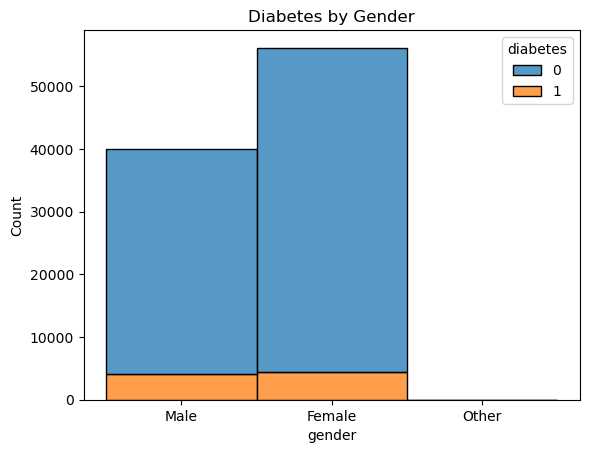

In [23]:
import warnings
warnings.filterwarnings('ignore')
# 1. 성별에 따른 당뇨발생 유무 (0, 1이 구분되어야 함)
import matplotlib.pyplot as plt
import seaborn as sns

# display(diabetes_need_df.groupby(['gender','diabetes']).size().unstack(fill_value=0).sum(axis=1))
# gender_diabetes_counts = diabetes_need_df.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)

# 각 성별에서 당뇨병 유무의 총계를 계산

sns.histplot(x='gender', hue='diabetes', data=diabetes_need_df, multiple='stack')
plt.title('Diabetes by Gender')
plt.show()

# 모집단 100000 명 중 여성의 비율이 높았으며 실제 당뇨가 있는 성별도 여성이 높았지만 전체적이 비율로 봤을 때, 
# 남성이 여성보다 당뇨에 걸린 비율이 높은 것을 알 수 있다.
# => 남성이 여성보다 당뇨에 걸릴 비중이 높다



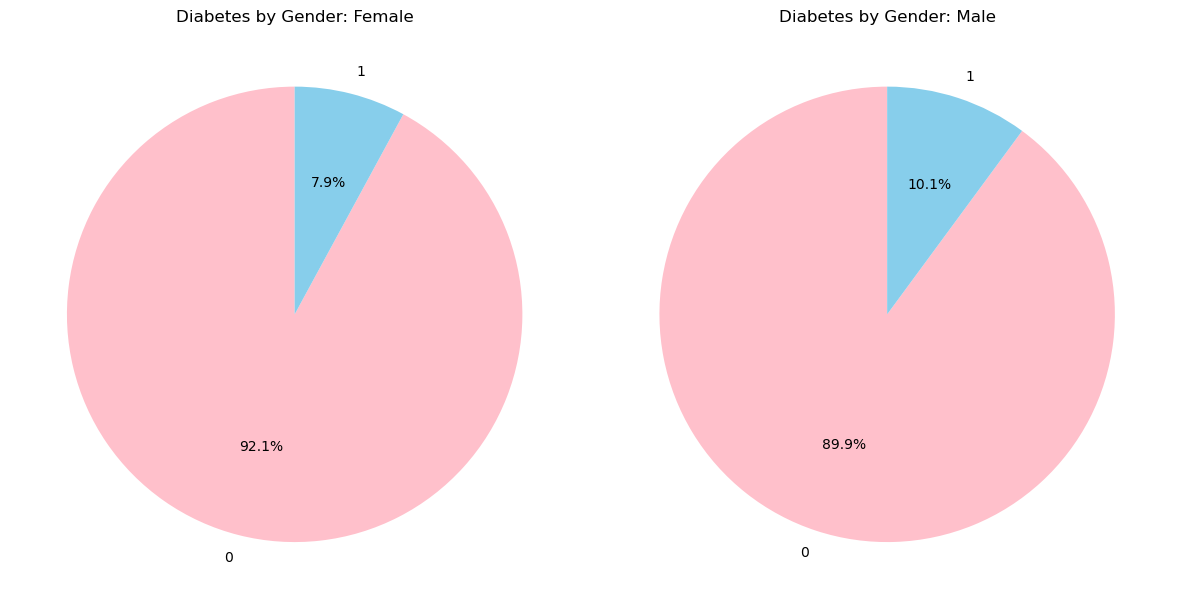

In [24]:
# 'gender'와 'diabetes'에 따라 데이터 카운트
counts = diabetes_need_df.groupby(['gender', 'diabetes']).size().unstack()
counts = counts.drop(labels='Other', axis=0)

# 각 성별에 대해 파이 차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (gender, data) in enumerate(counts.iterrows()):
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['pink','skyblue'])
    axes[i].set_title(f'Diabetes by Gender: {gender}')

plt.tight_layout()
plt.show()

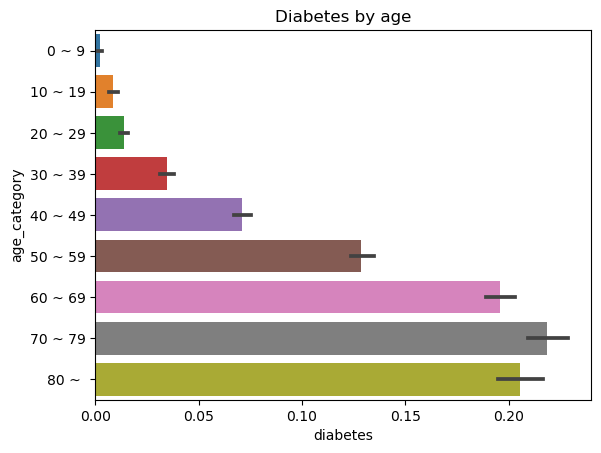

In [25]:
# 2. 나이 범주에 따른 당뇨발생 유무

sns.barplot(x='diabetes' , y='age_category',data=diabetes_need_df)
plt.title('Diabetes by age')
plt.show()

# 0~80 까지 당뇨에 걸린 사람을 확인하였을 떄 70~ 79세 사이가 가장 높게 걸렸으며 그 이후 80세> 60세 순으로 낮아지고 있다.
# 해당 그래프를 확인 했을 때 나이가 높을 수록 당뇨에 걸린 사람이 많으며 현재 80세 이상에서 최다 수치를 보이지 않는 것은
# 모집단의 모수가 부족해서 이기 때문으로 예상할 수 있으며 당뇨는 나이와 관계가 있을 수 있음을 시사한다.

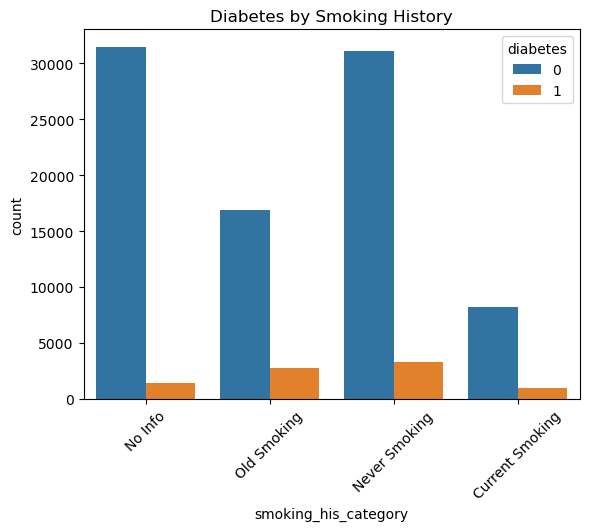

In [26]:
# 3. 흡연 정도에 따른 당뇨발생 유무:
# 흡연 정도(smoking_his_category)에 따른 당뇨 발생을 비교하기 위해 countplot을 사용하며, hue로 당뇨 유무를 표시합니다.
# 0: 정보 없음 (No Info) , 1: 미흡연(Never), 2: 과거 흡연(former,ever, not current), 3:현재 흡연(current)

import numpy as np
smoking_image_df = diabetes_need_df.copy()


# 숫자를 문자열로 매핑
mapping_dict = {0: 'No Info(0)', 1: 'Never Smoking(1)', 2: 'Old Smoking(2)', 3: 'Current Smoking(3)'}
mapping_dict = {0: 'No Info', 1: 'Never Smoking', 2: 'Old Smoking', 3: 'Current Smoking'}
smoking_image_df['smoking_his_category'] = smoking_image_df['smoking_his_category'].map(mapping_dict)
smoking_image_df


smoking_image_df['diabetes'] = smoking_image_df['diabetes'].astype(str)

sns.countplot(x='smoking_his_category', hue='diabetes', data=smoking_image_df)
plt.title('Diabetes by Smoking History')
plt.xticks(rotation=45)
plt.show() 

# 아래 그래프를 보았을 때 현재 담배를 피는 환자에 비하여 비흡연자가 당뇨에 걸린 인원이 많은 부분을 확인하였습니다.
# 따라서 흡연과 당뇨는 절대적인 관계는 없다고 인지할 수 있습니다. 

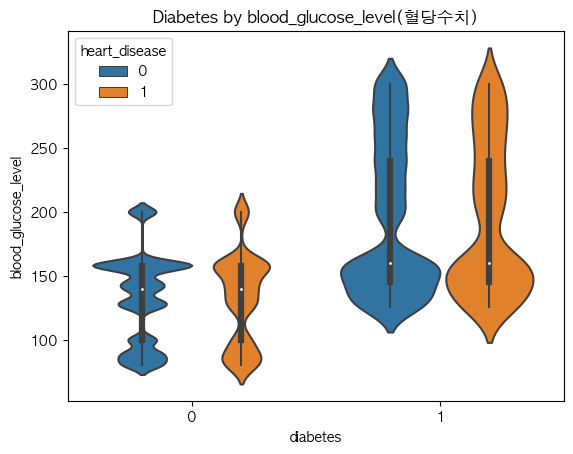

In [27]:
# 4. 혈중 포도당 수치에 따른 당뇨발생 유무
# blood_glucose_level >= 140 이상
plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'

sns.violinplot(x='diabetes', y='blood_glucose_level', hue='heart_disease', data = diabetes_need_df)
plt.title('Diabetes by blood_glucose_level(혈당수치)')
plt.show()

# 혈중 포도당 수치에 따른 당뇨 발생 유무를 비교해봤을 때 가장 당뇨가 발생한 경우 혈중 포도당 수치가 최소값이 
# 걸리지 않은 사람보다 최대값이 높은 경우가 나타나고 있는 부분을 확연하게 알 수 있습니다.
# 따라서 정상범위 내에 있는 사람의 경우 당뇨가 있다고 단정짓기는 어려우나 혈중 포도당 수치가 높은 경우 당뇨가 있을 확률이 있을 수 있습니다.

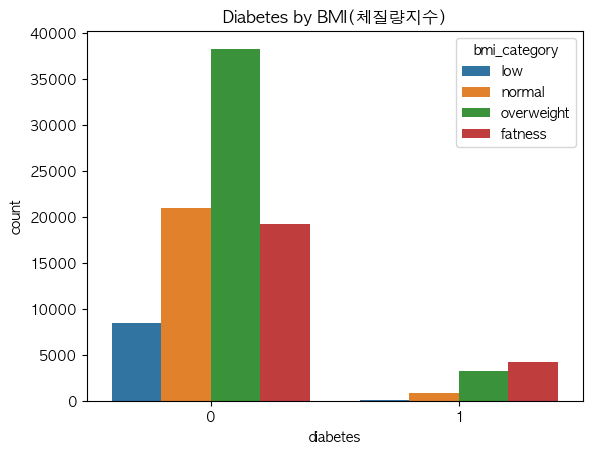

In [28]:
# 5. bmi 지수에 관련된 당뇨발생 유무
# 저체중: 18.5 미만 # 정상: 18.5-24.9 # 과체중: 25-29.9 # 비만: 30 이상\
# BMI 지수에 관련된 당뇨발생 유무: bmi_category에 따른 당뇨 발생을 분석하기 위해 countplot 또는 barplot을 사용하고, hue로 당뇨 유무를 구분합니다.

bmi_order = ['low', 'normal', 'overweight', 'fatness']

sns.countplot(x='diabetes', hue='bmi_category', data=diabetes_need_df, hue_order=bmi_order)
plt.title('Diabetes by BMI(체질량지수)')
plt.show()

# 현재 당뇨에 걸린 환자에 대하여 bmi 지수를 확인했을 떄 저체중인 환자보다 과체중 < 비만 인 환자에 대하여 당뇨가 높은 것을 알 수 있습니다.
# 당뇨에 걸리지 않은 환자의 경우 최다 인원이 과체중이지만 당뇨에 걸린 환자는 비만인 경우가 가장 많기 때문에 당뇨와 비만의 정도는 상관관계가 있는 것으로 확인 할 수 있습니다.

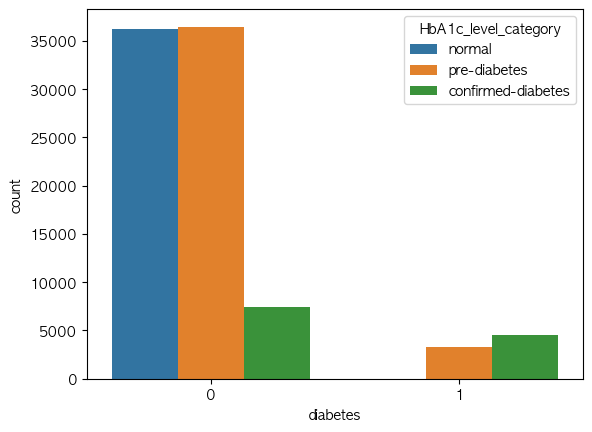

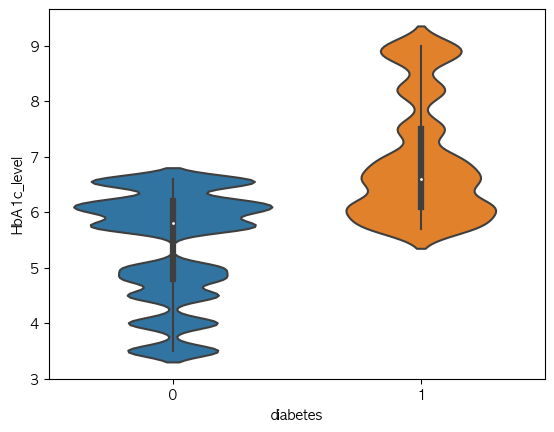

In [29]:
# 6. 담화혈색소 범주에 따른 당뇨발생 유무
# 정상: 5.7% 미만 / 당뇨병 전 단계: 5.7%-6.4% /당뇨병: 6.5% 이상
# HbA1c_level_category와 당뇨 발생의 관계를 보기 위해 countplot 또는 barplot이 적합합니다. 여기서도 hue로 당뇨 유무를 나타낼 수 있습니다.

HbAlc_order = ['normal', 'pre-diabetes', 'confirmed-diabetes']

sns.countplot(x='diabetes', hue='HbA1c_level_category',  data=diabetes_need_df, hue_order=HbAlc_order)
plt.show()

# 담화혈색소 범주가 정상인 사람들은 당뇨가 발생한 카운트가 하나도 없지만 당뇨병 전단계, 당뇨병으로 예상되는 수치가 넘어가는 경우 무조건적으로
# 당뇨라고 할 수 없습니다. 따라서 해당 수치가 높은 경우 당뇨인지 알아보기 위해 다른 그래프로 시각화가 필요합니다.

sns.violinplot(x='diabetes' , y='HbA1c_level' , data=diabetes_need_df)
plt.show()

# 담화혈색소가 약 6.7% 이상 넘어가는 경우 전부 당뇨에 걸린 환자이며 해당 수치를 확인했을 때 담화혈색소가 6.5 이상인 환자에 대해서 당뇨가 나타나는 것을 확인할 수 있습니다.

In [30]:
# 당뇨가 있는 환자 중 심장질환이 있는 환자를 확인할 수 있을까?
diabetes_is_df = diabetes_need_df[diabetes_need_df['diabetes'] == 1]
heart_diabetes_is_df = diabetes_is_df[diabetes_is_df['heart_disease'] == 1].reset_index(drop=True)
heart_diabetes_is_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_his_category,bmi_category,age_category,HbA1c_level_category
0,Male,6.0,0,1,17.17,6.5,240,1,2,low,0 ~ 9,None
1,Female,31.0,0,1,20.04,6.0,280,1,3,normal,30 ~ 39,pre-diabetes
2,Male,34.0,0,1,27.32,9.0,300,1,3,overweight,30 ~ 39,confirmed-diabetes
3,Male,37.0,0,1,33.01,5.7,260,1,2,fatness,30 ~ 39,pre-diabetes
4,Female,38.0,0,1,29.13,6.5,220,1,3,overweight,30 ~ 39,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,Male,80.0,0,1,27.32,7.5,130,1,2,overweight,80 ~,confirmed-diabetes
1263,Male,80.0,1,1,23.24,6.6,300,1,1,normal,80 ~,confirmed-diabetes
1264,Female,80.0,1,1,30.84,6.2,300,1,2,fatness,80 ~,pre-diabetes
1265,Male,80.0,0,1,29.40,7.5,145,1,1,overweight,80 ~,confirmed-diabetes


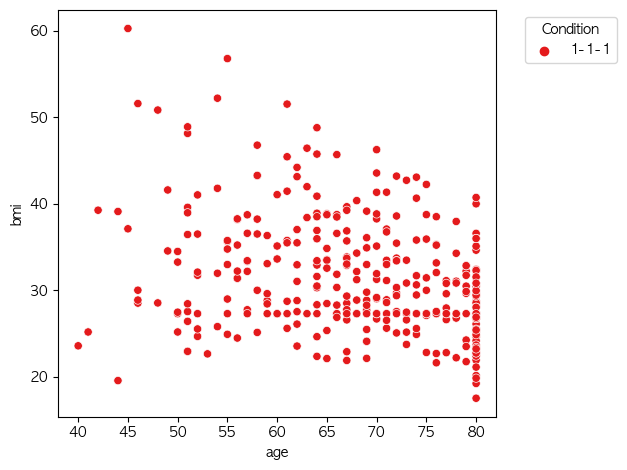

In [31]:
# 전체 데이터셋 사용 (당뇨병, 고혈압, 심자질환 유무 모두 포함)
diabetes_need_df['condition'] = (
    diabetes_need_df['diabetes'].astype(str) + '-' +
    diabetes_need_df['hypertension'].astype(str) + '-' +
    diabetes_need_df['heart_disease'].astype(str)
)

# '0-0-0' 조건 (당뇨병, 고혈압, 심장 질환 모두 없음)을 제외한 데이터만 필터링
# filtered_df = diabetes_need_df[diabetes_need_df['condition'] != '0-0-0']
filtered_df = diabetes_need_df[diabetes_need_df['condition'] == '1-1-1']

# 필터링된 데이터로 scatterplot 그리기
sns.scatterplot(x='age', y='bmi', hue='condition', data=filtered_df, palette='Set1')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

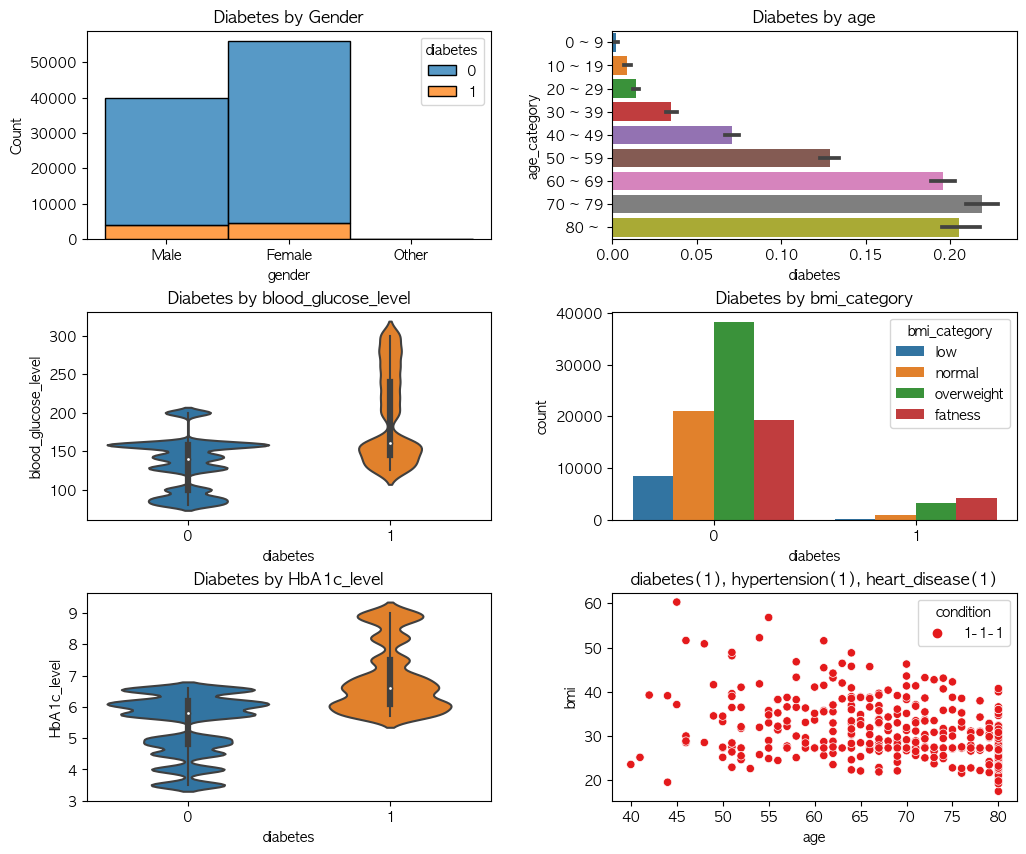

In [32]:
plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(3, 2, figsize=(12, 10))


sns.histplot(x='gender', hue='diabetes', data=diabetes_need_df, multiple='stack',ax=axes[0,0])
axes[0,0].set_title('Diabetes by Gender')
sns.barplot(x='diabetes' , y='age_category',data=diabetes_need_df, ax=axes[0,1])
axes[0,1].set_title('Diabetes by age')
sns.violinplot(x='diabetes', y='blood_glucose_level' , data = diabetes_need_df, ax=axes[1,0])
axes[1,0].set_title('Diabetes by blood_glucose_level')
sns.countplot(x='diabetes', hue='bmi_category', data=diabetes_need_df, hue_order=bmi_order,  ax=axes[1,1])
axes[1,1].set_title('Diabetes by bmi_category')
sns.violinplot(x='diabetes' , y='HbA1c_level', data=diabetes_need_df, ax=axes[2,0])
axes[2,0].set_title('Diabetes by HbA1c_level')
sns.scatterplot(x='age', y='bmi', hue='condition', data=filtered_df, palette='Set1')
axes[2,1].set_title('diabetes(1), hypertension(1), heart_disease(1)')

plt.subplots_adjust(hspace=0.35, wspace=0.3)

plt.show()



# 심장/뇌졸증 전처리 시작

In [33]:
# 총 6가지의 시각화 과정을 통해 가장 관련있는 변수의 경우 성별, 나이, 혈중포도당 수치, bmi 수치가 관련이 되어 있는 것으로 판단되어 
# 심장/뇌졸증 증상과 관련하여 연관성이 있는 변수가 있는지 찾기 위하여 심장/뇌졸증 데이터 세트를 분석 시작합니다.

In [34]:
# 필요 데이터를 확인하기 위해 copy 작성
# 당뇨 데이터셋과 동일한 컬럼을 사용하기 위해 일부 컬럼 명칭 변경 및 불필요 데이터 제거

hs_need_df = hs_df.copy()
hs_need_df


hs_need_df.columns = ['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay',
                      'hypertension','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
                      'sysBP','diaBP', 'bmi', 'heartRate', 'blood_glucose_level', 'Heart_stroke']

hs_need_df = hs_need_df.drop(labels = ['cigsPerDay','education'], axis = 1)
hs_need_df

,gender,age,currentSmoker,hypertension,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,bmi,heartRate,blood_glucose_level,Heart_stroke
0,Male,39,0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,1,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,1,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,1,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,1,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,1,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,1,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [35]:
# 중복행 확인 -> 중복행 확인 불가
hs_need_df.duplicated().sum()

0

In [36]:
# 결측치 확인
hs_need_df.isna().sum()
# 아래 컬럼에 대하여 결측치가 있으며 해당 환자들이 당뇨가 있는지 판단
# education , hypertension totChol bmi heartRate blood_glucose_level

# 결측치가 1개라도 있는 행 확인
missing_rows = hs_need_df[['hypertension','totChol','bmi','heartRate','blood_glucose_level']].isna().any(axis =1)

# 결측치가 있는 행 중 당뇨가 있는 데이터 확인 (3건)
missing_row_df = hs_need_df[missing_rows]
row_index_dia = missing_row_df[missing_row_df['diabetes'] == 1].index


# 결측치가 있는 행 중 심장/뇌졸증이 있는 데이터 확인 (70건)
row_index_hs = missing_row_df[missing_row_df['Heart_stroke'] == 'yes'].index

row_index = row_index_hs.union(row_index_dia)

# 유의미한 결측치에 대한 데이터 row 삭제 (별도로 판단할 수 있는 기준이 없기 때문에 삭제)
hs_need_df = hs_need_df.drop(row_index, axis=0).reset_index(drop=True)

# 무의미한 결측치에 대한 데이터 row 삭제 (382)
missing_rows = hs_need_df[['hypertension','totChol','bmi','heartRate','blood_glucose_level']].isna().any(axis =1)

row_index_no = hs_need_df[missing_rows].index
hs_need_df = hs_need_df.drop(row_index_no, axis=0).reset_index(drop=True)
hs_need_df

,gender,age,currentSmoker,hypertension,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,bmi,heartRate,blood_glucose_level,Heart_stroke
0,Male,39,0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,1,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,1,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,Male,58,0,0.0,no,1,0,187.0,141.0,81.0,24.96,80.0,81.0,No
3770,Male,68,0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,79.0,yes
3771,Male,50,1,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
3772,Male,51,1,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No


In [37]:
hs_need_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               3774 non-null   object 
 1   age                  3774 non-null   int64  
 2   currentSmoker        3774 non-null   int64  
 3   hypertension         3774 non-null   float64
 4   prevalentStroke      3774 non-null   object 
 5   prevalentHyp         3774 non-null   int64  
 6   diabetes             3774 non-null   int64  
 7   totChol              3774 non-null   float64
 8   sysBP                3774 non-null   float64
 9   diaBP                3774 non-null   float64
 10  bmi                  3774 non-null   float64
 11  heartRate            3774 non-null   float64
 12  blood_glucose_level  3774 non-null   float64
 13  Heart_stroke         3774 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 412.9+ KB


In [38]:
# 나이 카테고리 컬럼 생성
hs_need_df['age_category'] = hs_need_df['age'].apply(get_age)
# diabetes_need_df = diabetes_need_df.drop(labels = 'age', axis =1)
hs_need_df = hs_need_df.sort_values('age').reset_index(drop=True)
hs_need_df

,gender,age,currentSmoker,hypertension,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,bmi,heartRate,blood_glucose_level,Heart_stroke,age_category
0,Female,32,1,0.0,no,0,0,242.0,111.0,70.0,29.84,80.0,88.0,No,30 ~ 39
1,Female,33,1,0.0,no,0,0,200.0,119.0,74.0,23.80,75.0,74.0,No,30 ~ 39
2,Male,33,0,0.0,no,0,0,165.0,136.0,75.0,24.95,88.0,90.0,No,30 ~ 39
3,Female,33,1,0.0,no,0,0,199.0,116.0,81.0,21.61,75.0,93.0,No,30 ~ 39
4,Female,33,0,0.0,no,0,0,158.0,108.0,67.0,19.84,86.0,69.0,No,30 ~ 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,Female,69,0,1.0,no,1,0,203.0,166.0,90.0,25.40,77.0,80.0,No,60 ~ 69
3770,Female,69,0,0.0,no,0,0,286.0,117.0,73.0,20.92,85.0,103.0,No,60 ~ 69
3771,Male,69,1,0.0,no,1,0,232.0,151.0,74.0,24.14,75.0,62.0,No,60 ~ 69
3772,Male,69,1,0.0,no,0,0,245.0,123.0,77.0,26.58,70.0,81.0,yes,60 ~ 69


In [39]:
# Heark_stroke 0,1 숫자로 변환
def change_heart_stroke(x):
    if x == 'No':
        return 0
    if x == 'yes':
        return 1

In [40]:
hs_need_df['Heart_stroke'] = hs_need_df['Heart_stroke'].apply(change_heart_stroke)
hs_need_df

,gender,age,currentSmoker,hypertension,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,bmi,heartRate,blood_glucose_level,Heart_stroke,age_category
0,Female,32,1,0.0,no,0,0,242.0,111.0,70.0,29.84,80.0,88.0,0,30 ~ 39
1,Female,33,1,0.0,no,0,0,200.0,119.0,74.0,23.80,75.0,74.0,0,30 ~ 39
2,Male,33,0,0.0,no,0,0,165.0,136.0,75.0,24.95,88.0,90.0,0,30 ~ 39
3,Female,33,1,0.0,no,0,0,199.0,116.0,81.0,21.61,75.0,93.0,0,30 ~ 39
4,Female,33,0,0.0,no,0,0,158.0,108.0,67.0,19.84,86.0,69.0,0,30 ~ 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,Female,69,0,1.0,no,1,0,203.0,166.0,90.0,25.40,77.0,80.0,0,60 ~ 69
3770,Female,69,0,0.0,no,0,0,286.0,117.0,73.0,20.92,85.0,103.0,0,60 ~ 69
3771,Male,69,1,0.0,no,1,0,232.0,151.0,74.0,24.14,75.0,62.0,0,60 ~ 69
3772,Male,69,1,0.0,no,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1,60 ~ 69


In [41]:
# bmi 수치별 카테고리 생성
hs_need_df['bmi_category'] = hs_need_df['bmi'].apply(get_bmi)
# diabetes_need_df = diabetes_need_df.drop(labels='bmi', axis =1)
hs_need_df

,gender,age,currentSmoker,hypertension,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,bmi,heartRate,blood_glucose_level,Heart_stroke,age_category,bmi_category
0,Female,32,1,0.0,no,0,0,242.0,111.0,70.0,29.84,80.0,88.0,0,30 ~ 39,overweight
1,Female,33,1,0.0,no,0,0,200.0,119.0,74.0,23.80,75.0,74.0,0,30 ~ 39,normal
2,Male,33,0,0.0,no,0,0,165.0,136.0,75.0,24.95,88.0,90.0,0,30 ~ 39,None
3,Female,33,1,0.0,no,0,0,199.0,116.0,81.0,21.61,75.0,93.0,0,30 ~ 39,normal
4,Female,33,0,0.0,no,0,0,158.0,108.0,67.0,19.84,86.0,69.0,0,30 ~ 39,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,Female,69,0,1.0,no,1,0,203.0,166.0,90.0,25.40,77.0,80.0,0,60 ~ 69,overweight
3770,Female,69,0,0.0,no,0,0,286.0,117.0,73.0,20.92,85.0,103.0,0,60 ~ 69,normal
3771,Male,69,1,0.0,no,1,0,232.0,151.0,74.0,24.14,75.0,62.0,0,60 ~ 69,normal
3772,Male,69,1,0.0,no,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1,60 ~ 69,overweight


In [42]:
# 1. 성별에 따른 심장/뇌질환 유무
# 2. 나이 범주에 따른 심장/뇌질환 유무
# 3. 흡연 정도에 따른 심장/뇌질환 유무
# 4. 혈중 포도당 수치에 따른 심장/뇌질환 유무
# 5. bmi 지수에 관련된 심장/뇌질환 유무

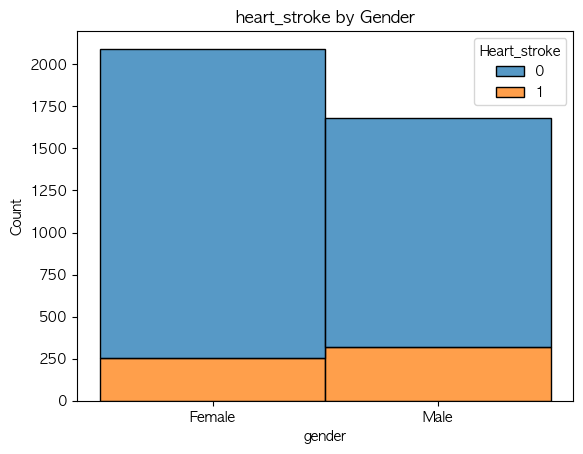

In [43]:
# 1. 성별에 따른 심장/뇌질환 유무
sns.histplot(x='gender', hue='Heart_stroke', data=hs_need_df, multiple='stack')
plt.title('heart_stroke by Gender')
plt.show()

# 모집단의 수가 남성보다 여성이 낮지만 심장/뇌혈관 질환이 여성보다 남성이 높게 나타났으며 당뇨 또한 유사한 양상을 보이고 있기 떄문에
# 성별이 당뇨, 심장/뇌혈관 질환에 유의미한 영향이 있을 수 있음을 시사합니다.

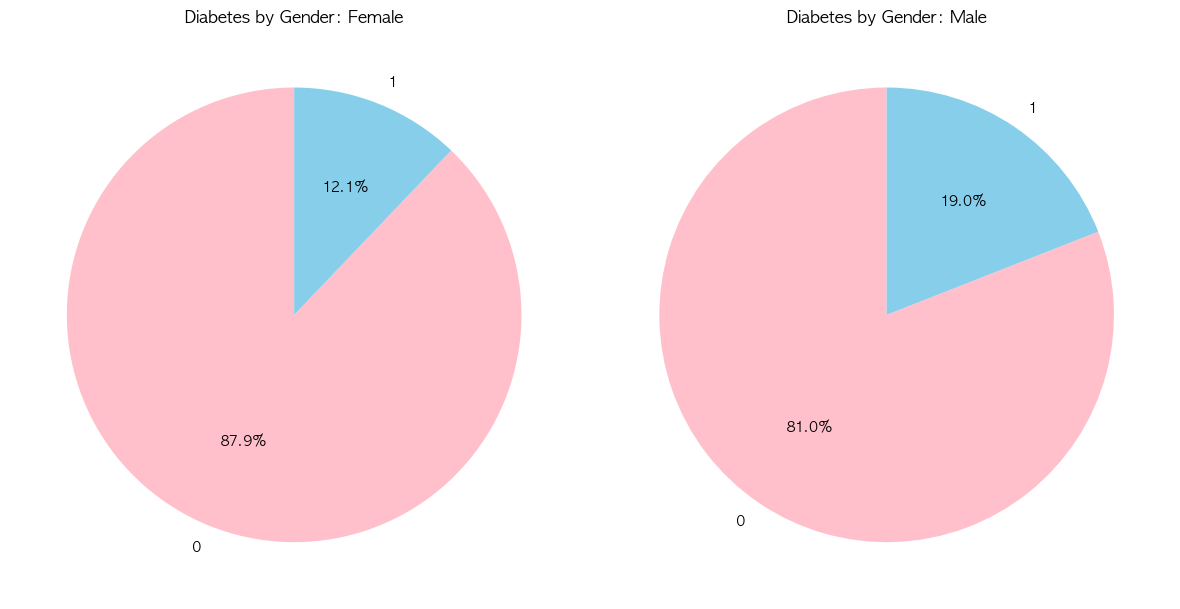

In [44]:
# 'gender'와 'diabetes'에 따라 데이터 카운트
count_heart_stroke = hs_need_df.groupby(['gender', 'Heart_stroke']).size().unstack()

# 각 성별에 대해 파이 차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (gender, data) in enumerate(count_heart_stroke.iterrows()):
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['pink','skyblue'])
    axes[i].set_title(f'Diabetes by Gender: {gender}')

plt.tight_layout()
plt.show()

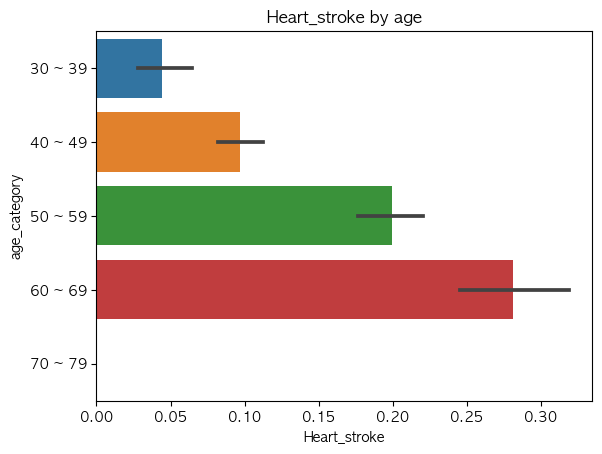

In [45]:
# 2. 나이 범주에 따른 심장/뇌질환 유무

sns.barplot(x='Heart_stroke' , y='age_category',data=hs_need_df)
plt.title('Heart_stroke by age')
plt.show()

# 모집단이 30 ~ 70대 까지 분포되어 있지만 실질적으로 70세의 모수는 1로 측정되었고 해당 환자의 경우 심장/뇌졸증 질환은 존재하지 않기 떄문에
# 해당 시각화 그래프를 확인했을 때 나이가 증가할 수록 더 많은 수의 질환이 있다고 확인할 수 있습니다.

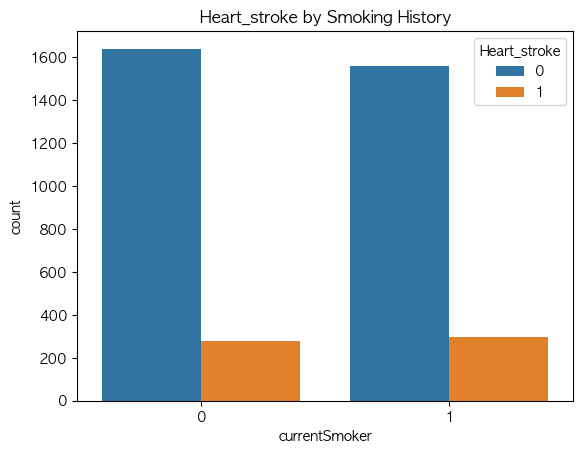

In [46]:
# 3. 흡연 정도에 따른 심장/뇌질환 유무
import numpy as np

hs_need_df['Heart_stroke'] = hs_need_df['Heart_stroke'].astype(str)

sns.countplot(x='currentSmoker', hue='Heart_stroke', data=hs_need_df)
plt.title('Heart_stroke by Smoking History')
plt.show() 

hs_need_df['Heart_stroke'] = hs_need_df['Heart_stroke'].astype(np.float64)
# 그래프 확인 결과 현재 흡연자와 비흡연자를 비교 하였을 때 해당 질환에 대해서 거의 1:1 결과를 보여주고 있기 때문에 해당 데이터는
# 유사성이 크지 않음을 확인할 수 있습니다.

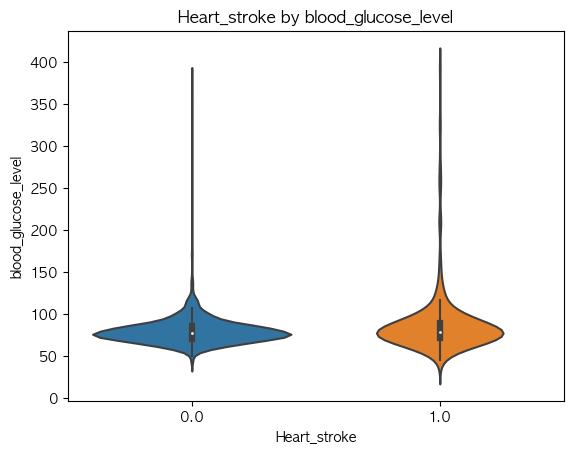

In [47]:
# 4. 혈중 포도당 수치에 따른 심장/뇌질환 유무
# blood_glucose_level >= 140 이상


sns.violinplot(x='Heart_stroke', y='blood_glucose_level', data = hs_need_df)
plt.title('Heart_stroke by blood_glucose_level')
plt.show()

# 해당 분포 확인 결과 혈중 포도당 수치와 심장/뇌졸증 간의 상관관계는 유사성을 찾을 수 없을 것으로 생각됩니다.

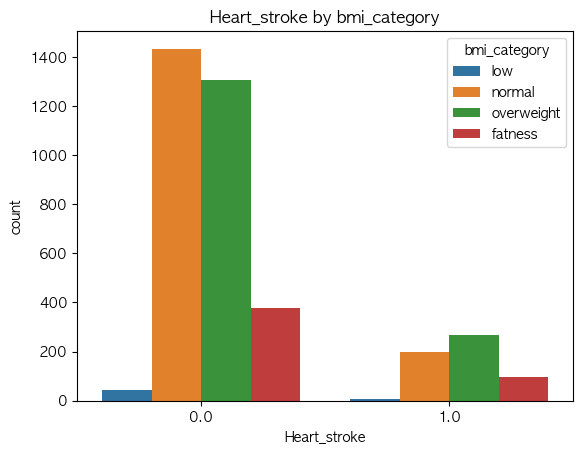

In [48]:
# 5. bmi 지수에 관련된 심장/뇌질환 유무
# 저체중: 18.5 미만 # 정상: 18.5-24.9 # 과체중: 25-29.9 # 비만: 30 이상\
# BMI 지수에 관련된 당뇨발생 유무: bmi_category에 따른 당뇨 발생을 분석하기 위해 countplot 또는 barplot을 사용하고, hue로 당뇨 유무를 구분합니다.

bmi_order = ['low', 'normal', 'overweight', 'fatness']

sns.countplot(x='Heart_stroke', hue='bmi_category', data=hs_need_df, hue_order=bmi_order)
plt.title('Heart_stroke by bmi_category')
plt.show()

# 현재 심장/뇌졸증에 걸린 환자에 대하여 bmi 지수를 확인했을 떄 저체중인 환자보다 과체중 < 비만 인 환자에 대하여 심장/뇌졸증 빈도가 높은 것을 알 수 있습니다.
# 현재 데이터 상으로는 normal < overweight 순으로 높아지고 fatness 의 경우 상대적으로 적은 수치를 보이지만 전체 모집단 수 대비
# 높은 발생 빈도를 나타나는 것으로 보아 bmi 지수와 관련이 있는 것으로 확인됩니다.

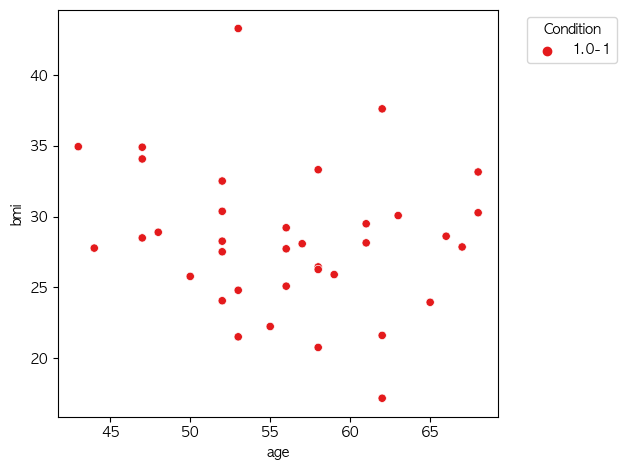

In [49]:
# 전체 데이터셋 사용 (당뇨병, 고혈압, 심자질환 유무 모두 포함)
hs_need_df['condition'] = (
   hs_need_df['Heart_stroke'].astype(str)+ '-' +  hs_need_df['diabetes'].astype(str) 
)
hs_need_df

# '0-0-0' 조건 (당뇨병, 고혈압, 심장 질환 모두 없음)을 제외한 데이터만 필터링
# filtered_df = diabetes_need_df[diabetes_need_df['condition'] != '0-0-0']
filtered_hs_df = hs_need_df[hs_need_df['condition'] == '1.0-1']
filtered_hs_df

# 필터링된 데이터로 scatterplot 그리기
sns.scatterplot(x='age', y='bmi', hue='condition', data=filtered_hs_df, palette='Set1')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

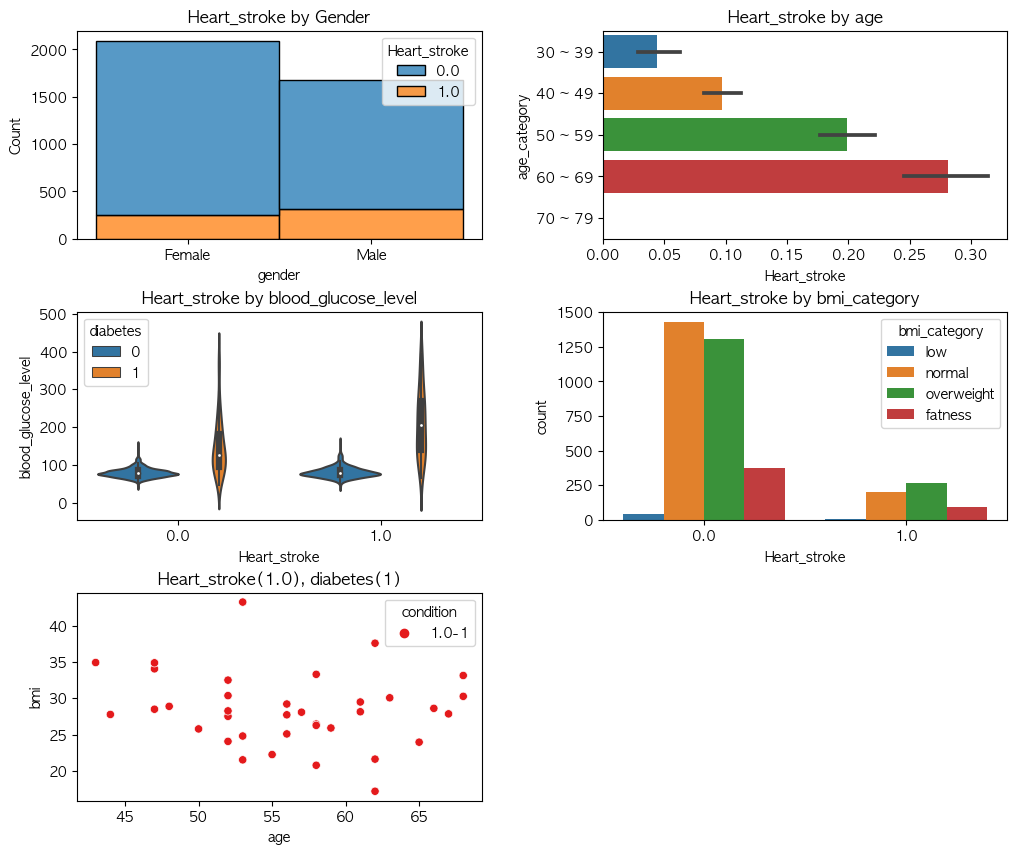

In [50]:
plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(x='gender', hue='Heart_stroke', data=hs_need_df, multiple='stack',ax=axes[0,0])
axes[0,0].set_title('Heart_stroke by Gender')
sns.barplot(x='Heart_stroke' , y='age_category',data=hs_need_df, ax=axes[0,1])
axes[0,1].set_title('Heart_stroke by age')
sns.violinplot(x='Heart_stroke', y='blood_glucose_level' ,hue = 'diabetes', data = hs_need_df,ax=axes[1,0])
axes[1,0].set_title('Heart_stroke by blood_glucose_level')
sns.countplot(x='Heart_stroke', hue='bmi_category', data=hs_need_df, hue_order=bmi_order, ax=axes[1,1])
axes[1,1].set_title('Heart_stroke by bmi_category')
sns.scatterplot(x='age', y='bmi', hue='condition', data=filtered_hs_df, palette='Set1', ax=axes[2,0])
axes[2,0].set_title('Heart_stroke(1.0), diabetes(1)')

axes[2,1].set_visible(False)

plt.subplots_adjust(hspace=0.35, wspace=0.3)

plt.show()

# 심장질환 전처리 시작

In [51]:
# 필요 데이터 프래임 생성
h_need_df = h_df.copy()

In [52]:
# 중복행 확인 (중복행이 존재하지만 다른 모수일 수 있기 때문에 별도로 삭제하지 않음)
h_need_df.duplicated().sum()
h_need_df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,M,2,110,264,0,Normal,132,N,1.2,Flat,NaN,NaN,1
2242,68,M,0,144,193,1,Normal,141,N,3.4,Flat,NaN,NaN,1
2243,57,M,0,130,131,0,Normal,115,Y,1.2,Flat,NaN,NaN,1
2244,57,F,1,130,236,0,LVH,174,N,0.0,Flat,NaN,NaN,1


In [53]:
# 결측치 있는 데이터에 관하여 별도 데이터 프레임으로 분류하여 차후 필요시 추가 분석
# 필요데이터에서 해당 feature 제거 후 분석 진행

h_need_other_df = h_need_df[h_need_df.isna().any(axis =1)].reset_index(drop=True)
h_need_other_df

# 기존 필요데이터에서 feature 제거
h_need_df = h_need_df.drop(labels=['num_major_vessels','thal'], axis=1)
h_need_df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,M,2,110,264,0,Normal,132,N,1.2,Flat,1
2242,68,M,0,144,193,1,Normal,141,N,3.4,Flat,1
2243,57,M,0,130,131,0,Normal,115,Y,1.2,Flat,1
2244,57,F,1,130,236,0,LVH,174,N,0.0,Flat,1


In [54]:
# 나이 카테고리 생성
h_need_df['age_category'] = h_need_df['age'].apply(get_age)
h_need_df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target,age_category
0,63,1,3,145,233,1,0,150,0,2.3,0,1,60 ~ 69
1,37,1,2,130,250,0,1,187,0,3.5,0,1,30 ~ 39
2,41,0,1,130,204,0,0,172,0,1.4,2,1,40 ~ 49
3,56,1,1,120,236,0,1,178,0,0.8,2,1,50 ~ 59
4,57,0,0,120,354,0,1,163,1,0.6,2,1,50 ~ 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,M,2,110,264,0,Normal,132,N,1.2,Flat,1,40 ~ 49
2242,68,M,0,144,193,1,Normal,141,N,3.4,Flat,1,60 ~ 69
2243,57,M,0,130,131,0,Normal,115,Y,1.2,Flat,1,50 ~ 59
2244,57,F,1,130,236,0,LVH,174,N,0.0,Flat,1,50 ~ 59


In [55]:
# 성별 통일화 (0:남자, 1:여자)

In [56]:
def update_gender(x):
    if x == '0' or x == 'M':
        return 'Male'
    if x == '1' or x == 'F':
        return 'Female'

In [57]:
h_need_df['sex'] = h_need_df['sex'].apply(update_gender)
h_need_df = h_need_df.rename(columns={'sex': 'gender'})
h_need_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target,age_category
0,63,Female,3,145,233,1,0,150,0,2.3,0,1,60 ~ 69
1,37,Female,2,130,250,0,1,187,0,3.5,0,1,30 ~ 39
2,41,Male,1,130,204,0,0,172,0,1.4,2,1,40 ~ 49
3,56,Female,1,120,236,0,1,178,0,0.8,2,1,50 ~ 59
4,57,Male,0,120,354,0,1,163,1,0.6,2,1,50 ~ 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,Male,2,110,264,0,Normal,132,N,1.2,Flat,1,40 ~ 49
2242,68,Male,0,144,193,1,Normal,141,N,3.4,Flat,1,60 ~ 69
2243,57,Male,0,130,131,0,Normal,115,Y,1.2,Flat,1,50 ~ 59
2244,57,Female,1,130,236,0,LVH,174,N,0.0,Flat,1,50 ~ 59


In [58]:
# slope 통일화
def update_slope(x):
    if x == '0':
        return 'Up'
    if x == '1':
        return 'Flat'
    if x == '2':
        return 'Down'

In [59]:
h_need_df['slope'] = h_need_df['slope'].apply(update_slope)
h_need_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target,age_category
0,63,Female,3,145,233,1,0,150,0,2.3,Up,1,60 ~ 69
1,37,Female,2,130,250,0,1,187,0,3.5,Up,1,30 ~ 39
2,41,Male,1,130,204,0,0,172,0,1.4,Down,1,40 ~ 49
3,56,Female,1,120,236,0,1,178,0,0.8,Down,1,50 ~ 59
4,57,Male,0,120,354,0,1,163,1,0.6,Down,1,50 ~ 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,Male,2,110,264,0,Normal,132,N,1.2,None,1,40 ~ 49
2242,68,Male,0,144,193,1,Normal,141,N,3.4,None,1,60 ~ 69
2243,57,Male,0,130,131,0,Normal,115,Y,1.2,None,1,50 ~ 59
2244,57,Female,1,130,236,0,LVH,174,N,0.0,None,1,50 ~ 59


In [60]:
def update_exang(x):
    if x == 'N':
        return 0
    elif x == 'Y':
        return 1
    else:
        return x

In [61]:
h_need_df['exang'] = h_need_df['exang'].apply(update_exang)
h_need_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target,age_category
0,63,Female,3,145,233,1,0,150,0,2.3,Up,1,60 ~ 69
1,37,Female,2,130,250,0,1,187,0,3.5,Up,1,30 ~ 39
2,41,Male,1,130,204,0,0,172,0,1.4,Down,1,40 ~ 49
3,56,Female,1,120,236,0,1,178,0,0.8,Down,1,50 ~ 59
4,57,Male,0,120,354,0,1,163,1,0.6,Down,1,50 ~ 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,Male,2,110,264,0,Normal,132,0,1.2,None,1,40 ~ 49
2242,68,Male,0,144,193,1,Normal,141,0,3.4,None,1,60 ~ 69
2243,57,Male,0,130,131,0,Normal,115,1,1.2,None,1,50 ~ 59
2244,57,Female,1,130,236,0,LVH,174,0,0.0,None,1,50 ~ 59


In [62]:
# restecg 통일화
h_need_df['restecg'].value_counts()
# 0: Normal , 1: LVH, 2: ST

def update_restecg(x):
    if x == '0':
        return 'Normal'
    if x == '1':
        return 'LVH'
    if x == '2':
        return 'ST'
    else:
        return x

In [63]:
h_need_df['restecg'] = h_need_df['restecg'].apply(update_restecg)
h_need_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target,age_category
0,63,Female,3,145,233,1,Normal,150,0,2.3,Up,1,60 ~ 69
1,37,Female,2,130,250,0,LVH,187,0,3.5,Up,1,30 ~ 39
2,41,Male,1,130,204,0,Normal,172,0,1.4,Down,1,40 ~ 49
3,56,Female,1,120,236,0,LVH,178,0,0.8,Down,1,50 ~ 59
4,57,Male,0,120,354,0,LVH,163,1,0.6,Down,1,50 ~ 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,Male,2,110,264,0,Normal,132,0,1.2,None,1,40 ~ 49
2242,68,Male,0,144,193,1,Normal,141,0,3.4,None,1,60 ~ 69
2243,57,Male,0,130,131,0,Normal,115,1,1.2,None,1,50 ~ 59
2244,57,Female,1,130,236,0,LVH,174,0,0.0,None,1,50 ~ 59


In [64]:
# 콜레스테롤 범주
def get_cholesterol(x):
    if x < 200:
        return 'Normal'
    elif 200 <= x < 240:
        return 'Middle'
    else:
        return 'High'

In [65]:
h_need_df['cholestoral_category'] = h_need_df['cholestoral'].apply(get_cholesterol)
h_need_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,target,age_category,cholestoral_category
0,63,Female,3,145,233,1,Normal,150,0,2.3,Up,1,60 ~ 69,Middle
1,37,Female,2,130,250,0,LVH,187,0,3.5,Up,1,30 ~ 39,High
2,41,Male,1,130,204,0,Normal,172,0,1.4,Down,1,40 ~ 49,Middle
3,56,Female,1,120,236,0,LVH,178,0,0.8,Down,1,50 ~ 59,Middle
4,57,Male,0,120,354,0,LVH,163,1,0.6,Down,1,50 ~ 59,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,45,Male,2,110,264,0,Normal,132,0,1.2,None,1,40 ~ 49,High
2242,68,Male,0,144,193,1,Normal,141,0,3.4,None,1,60 ~ 69,Normal
2243,57,Male,0,130,131,0,Normal,115,1,1.2,None,1,50 ~ 59,Normal
2244,57,Female,1,130,236,0,LVH,174,0,0.0,None,1,50 ~ 59,Middle


In [66]:
h_need_df = h_need_df.rename(columns={'target': 'heart_target'})
h_need_df = h_need_df.sort_values('age').reset_index(drop= True)
h_need_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,heart_target,age_category,cholestoral_category
0,28,Male,1,130,132,0,LVH,185,0,0.0,None,0,20 ~ 29,Normal
1,29,Male,1,140,263,0,Normal,170,0,0.0,None,0,20 ~ 29,High
2,29,Male,1,120,243,0,Normal,160,0,0.0,None,0,20 ~ 29,High
3,29,Female,1,130,204,0,Normal,202,0,0.0,Down,1,20 ~ 29,Middle
4,29,Female,1,130,204,0,Normal,202,0,0.0,Down,1,20 ~ 29,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,77,Female,0,125,304,0,Normal,162,1,0.0,Down,0,70 ~ 79,High
2242,77,Male,0,124,171,0,ST,110,1,2.0,None,1,70 ~ 79,Normal
2243,77,Female,0,125,304,0,Normal,162,1,0.0,Down,0,70 ~ 79,High
2244,77,Male,0,125,304,0,LVH,162,1,0.0,None,1,70 ~ 79,High


In [67]:
import numpy as np
h_need_df['exang'] = h_need_df['exang'].astype(np.int64)

In [68]:
# 1. 성별에 따른 심장질환 유무
# 2. 나이 범주에 따른 심장질환 유무
# 3. 통증에 따른 심장 질환 유무
# 4. 안정기 혈압에 따른 심장질환유무
# 5. 콜레스테롤 수치에 따른 심장질환 유무
# 6. 공복혈당수치에 따른 심장질환 유무
# 7. 심전도 이상에 따른 심장 질환유무
# 8. 운동 유발 협심증 관련 심장질환 유무
# 9. 운동 이후 ST 분절 하강 정도에 따른 심장 질환 유무 

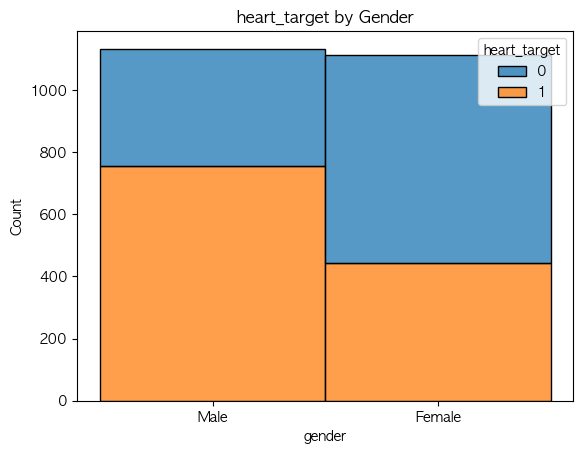

In [69]:
# 1. 성별에 따른 심장질환 유무
# warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='gender', hue='heart_target', data=h_need_df, multiple='stack')
plt.title('heart_target by Gender')
plt.show()


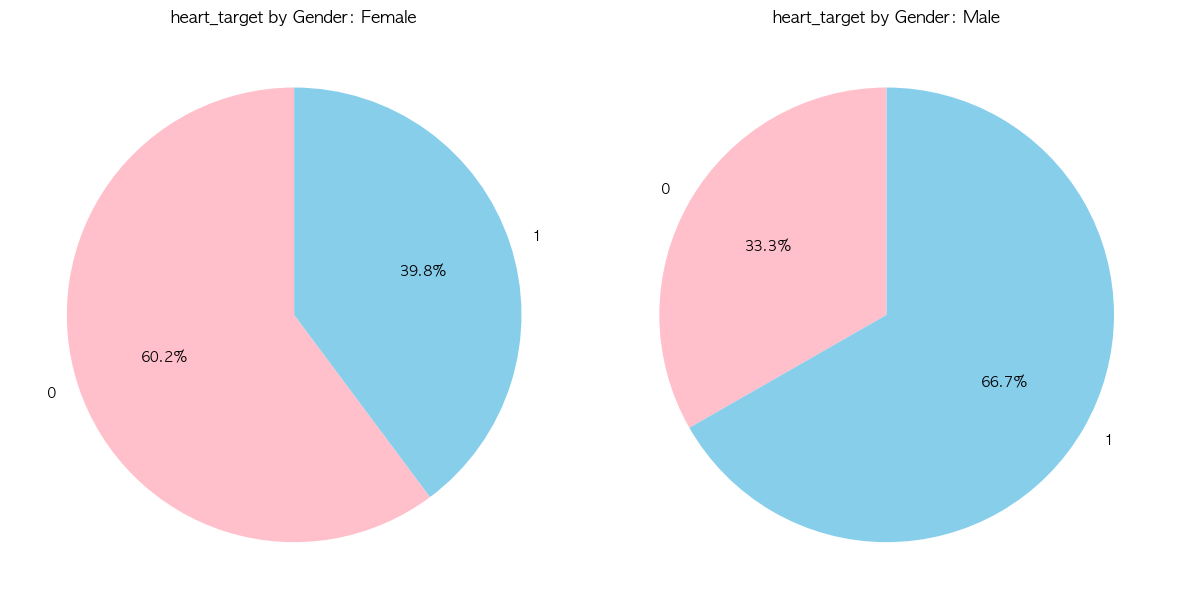

In [70]:
# 'gender'와 'diabetes'에 따라 데이터 카운트
counts_h_df = h_need_df.groupby(['gender', 'heart_target']).size().unstack()

# 각 성별에 대해 파이 차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (gender, data) in enumerate(counts_h_df.iterrows()):
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['pink','skyblue'])
    axes[i].set_title(f'heart_target by Gender: {gender}')

plt.tight_layout()
plt.show()

# 두가지 양상으로 봤을 떄 심장 질환의 경우 여성보다 남성이 병을 가지고 있는 환자가 많음을 알 수 있다.
# => 남성이 여성보다 심장 질환에 걸릴 비중이 높다

<Figure size 1200x1000 with 0 Axes>

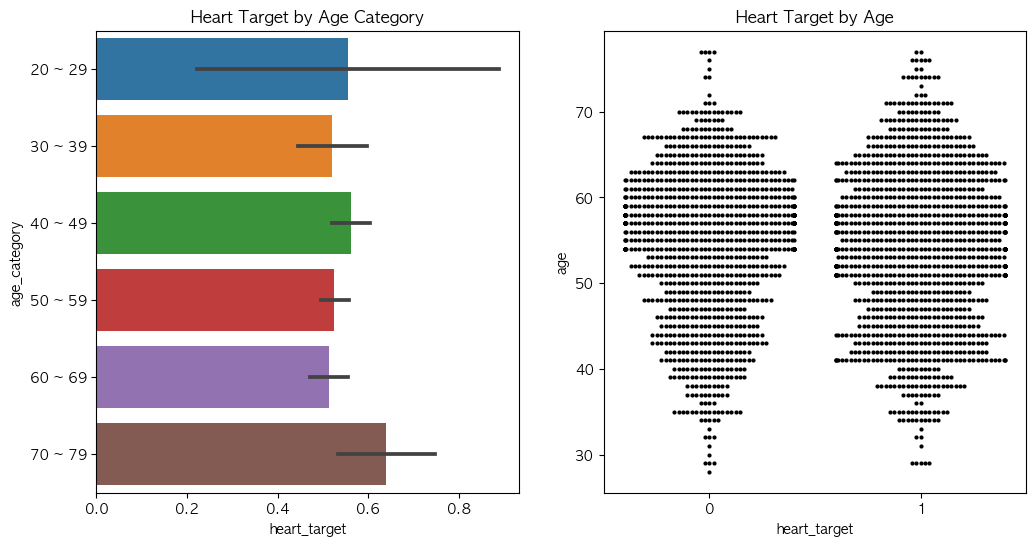

In [71]:
# 2. 나이 범주에 따른 심장질환 유무
plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.barplot(x='heart_target', y='age_category', data=h_need_df, ax=axes[0])
axes[0].set_title('Heart Target by Age Category')

sns.swarmplot(x='heart_target', y='age', data=h_need_df, color='black', size=3, ax=axes[1])
axes[1].set_title('Heart Target by Age')
plt.show()
# 데이터 세트를 확인 했을 때 20~ 30대, 70대 의 경우 데이터의 오차 범위(변동성)가 높을 수 있습니다.
# 따라서 해당 내용을 보았을 떄 심장질환의 경우 20대와 30대의 경우 변동성이 크거나 분포가 밀집되어있지 않을 확률이 높습니다.
# 또한 나이가 높아질 수록 오차범위는 줄어들기 떄문에 데이터를 추가 확보하여 확인 할 필요성이 있습니다.


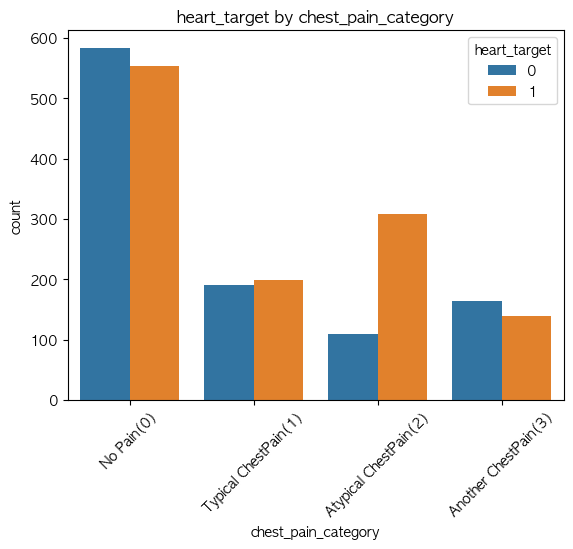

In [72]:
# 3. 통증에 따른 심장 질환 유무
# 0: 무통증, 1: 전형적인 심장협심증, 2: 불특정한 심장 협심증, 3: 심장이 아닌 다른 흉통
import numpy as np
chest_pain_df = h_need_df.copy()


# 숫자를 문자열로 매핑
mapping_h_dict = {0: 'No Pain(0)', 1: 'Typical ChestPain(1)', 2: 'Atypical ChestPain(2)', 3: 'Another ChestPain(3)'}
chest_pain_df['chest_pain_category'] = chest_pain_df['chest_pain_type'].map(mapping_h_dict)


chest_pain_df['heart_target'] = chest_pain_df['heart_target'].astype(str)

order_pain = ['No Pain(0)', 'Typical ChestPain(1)', 'Atypical ChestPain(2)', 'Another ChestPain(3)']

sns.countplot(x='chest_pain_category', hue='heart_target', data=chest_pain_df, order= order_pain)
plt.title('heart_target by chest_pain_category')
plt.xticks(rotation=45)
plt.show() 

# 흉통의 종류에 따라 심장 질환 여부를 확인해봤을 떄 심장 통증이 있는 경우 50% 이상의 경우로 심장 질환이 발생했으며, 
# 무증상인 경우에도 45% 이상의 확률로 심장질환이 발생하고 있습니다.
# 따라서 심장에 통증이 없더라도 다른 증상에 의해서 심장짏롼이 발생할 수 있는 경우를 시사하고 있으며 
# 여러 다른 질환에 영향을 받는 점을 시사할 수 있습니다.

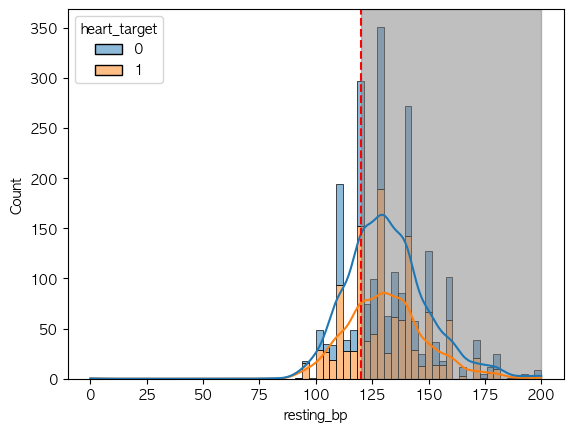

In [73]:
# 4. 안정기 혈압에 따른 심장질환유무
# 보통 수축기 혈압 120mmHg, 이완기 80mmHg 미만이 정상 혈압이라고 하는데 이거보다 올라가면 경계성 혈압이라 하고. 
# 140mmHg에 90mmHg보다 더 높게 혈압이 나오게 되면 고혈압이라고 일반적으로 진단을 받게 됩니다.

# 히스토그램과 KDE 그래프 그리기
sns.histplot(x='resting_bp', hue='heart_target', data=h_need_df, multiple='stack', kde=True)

# resting_bp가 130 이상인 부분에 세로 점선 그리기
plt.axvline(x=120, color='red', linestyle='--')
plt.axvspan(xmin=120, xmax=h_need_df['resting_bp'].max(), color='gray', alpha=0.5)
plt.show()

# 일반적으로 안정기 혈압이 120 이상이면 경계성 고혈압을 의심할 수 있습니다. 
# 120 이상인 환자에 대하여 심장질환의 분포를 구분하였을 떄 일반적으로 50% 가 넘긴 하지만 
# 정상적인 (심장질환 없는) 환자의 경우도 유사한 분포를 나타내고 있어 해당 변수에 대하서는 
# 심장질환과 연관성이 있다고 말할 수 없을 것 같습니다.

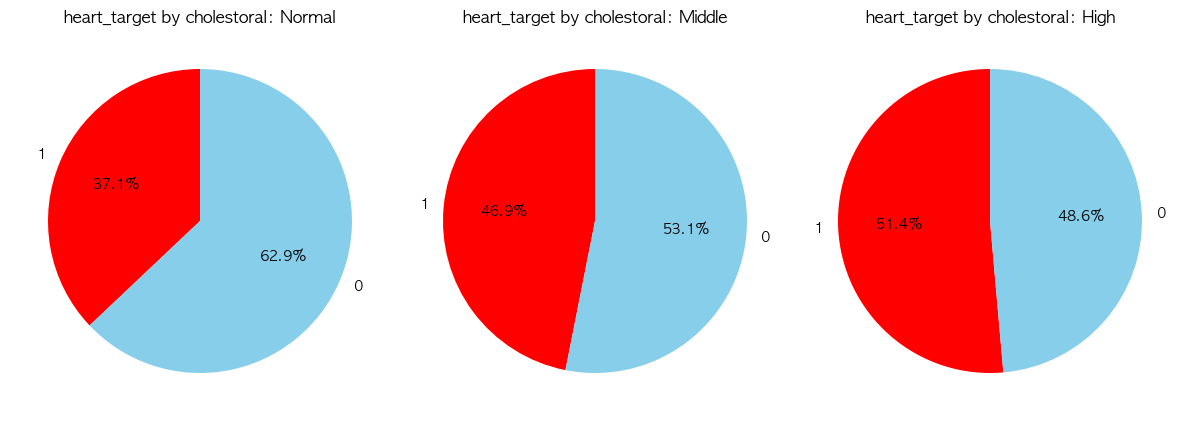

In [74]:
# 5. 콜레스테롤 수치에 따른 심장질환 유무

category_order = ['Normal', 'Middle', 'High']

counts_h_co_df = h_need_df.groupby(['cholestoral_category', 'heart_target']).size().unstack()
counts_h_co_df = counts_h_co_df.reindex(category_order)


# 파이 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, (cholestoral_category, data) in enumerate(counts_h_co_df.iterrows()):
    axes[i].pie(data, labels=data.index[::-1], autopct='%1.1f%%', startangle=90, colors=['red','skyblue'])
    axes[i].set_title(f'heart_target by cholestoral: {cholestoral_category}')

plt.tight_layout()
plt.show()

# 콜레스테롤 수치가 높아질 수록 심장 질환이 있을 확률이 점진적으로 높아지고 있는 양상을 보았을 떄,
# 콜레스테롤 수치가 심장질환에 일부 영향을 줄 수 있을음 시사합니다.

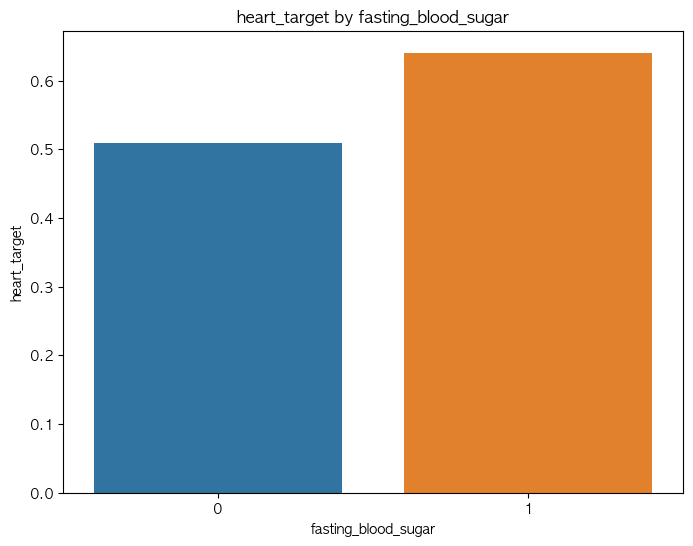

In [75]:
# 6. 공복혈당수치에 따른 심장질환 유무

mean_heart_disease = h_need_df.groupby('fasting_blood_sugar')['heart_target'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='fasting_blood_sugar', y='heart_target', data=mean_heart_disease)
plt.title('heart_target by fasting_blood_sugar')
plt.show()


# 공복혈당이 정상수치와 높을 경우에 심장질환 환자에 대하여 평균 수치값으로 비교를 하였을 때 우하양 그래프를 보이고 있습니다.
# 하지만 실제 평균 비율을 확인했을 때 정상과 높은 경우 약 51% 와 49% 수치로 비교 대상의 큰 차이가 없었으며, 
# 실제 혈당이 낮은 경우에도 심장질환의 위험성이 있다는 것을 감안하였을 떄 해당 변수로는 심장질환에 큰 영향을 미친다고 할 수 없을 것 같습니다.

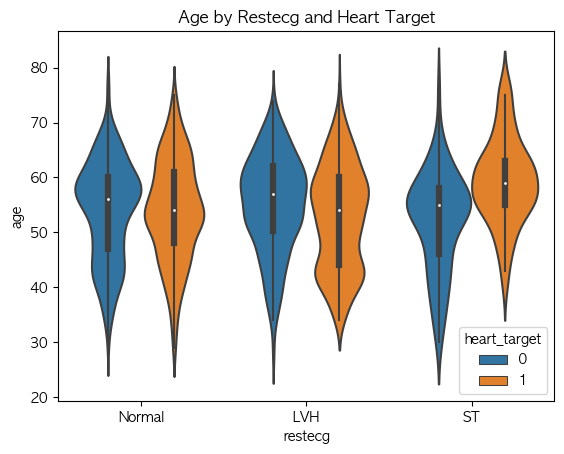

In [76]:
# 7. 심전도 이상에 따른 심장 질환유무 (휴식 시 심전도)
# Normal : 정상 , LVH: 좌심실 비대, ST: ST-T파 이상

sns.violinplot(x='restecg', y='age', hue='heart_target', data=h_need_df, order=['Normal', 'LVH', 'ST'])
plt.title('Age by Restecg and Heart Target')
plt.show()

# 해당 분포 그래프로 보았을 때 해당 증상의 유/무 와 관계없이 나이에 따라 유사한 분포 양상을 보이고 있습니다.
# ST-T 의 경우 관상동맥 질환, 또는 다양한 형태를 나타나고 있기 때문에 심장질환의 유사 특징을 비교할 수느 없으며,
# 실제 고혈압과 관련된 심전도 양상은 LVH(좌심실비대)의 경우 고혈압이나 다른 심장질환이 있을 때 발생할 수 있는 양상이지만 
# 심장질환이 나타나지 않은 사람(나이대)에서 더 많은 분포를 보이고 있는 부분이 있기 때문에 해당 변수는 심장질환의 단편적인 조건으로 보기는 어렵습니다.


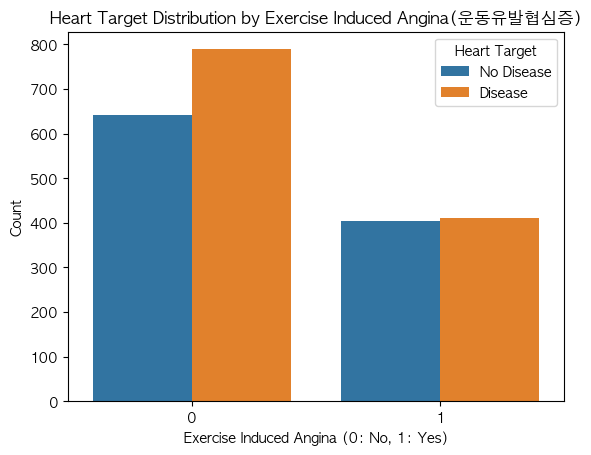

In [77]:
# 8. 운동 유발 협심증 관련 심장질환 유무 
# exang에 따른 `heart_target` 분포를 시각화

h_need_df['heart_target'] = h_need_df['heart_target'].astype(str)

sns.countplot(x='exang', hue='heart_target', data=h_need_df)

plt.title('Heart Target Distribution by Exercise Induced Angina(운동유발협심증)')
plt.xlabel('Exercise Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Target', labels=['No Disease', 'Disease'])
plt.show()

h_need_df['heart_target'] = h_need_df['heart_target'].astype(np.int64)

# 해당 그래프를 봤을 때 운동 유발 협심증을 인지한 사람들에 대해서는 거의 1:1 비율로 심장 질환이 있음을 시사할 수 있으며,
# 느끼지 못한 사람에 대해서는 더 많은 심장 질환이 있음을 시사합니다.
# 따라서 해당 운동유발 협심증을 느끼는 정도 유무에 관계 없이 심장 질환이 있을 수 있을 확률있으며 다른 변수들과 복합적으로 검사할 필요가 있습니다.

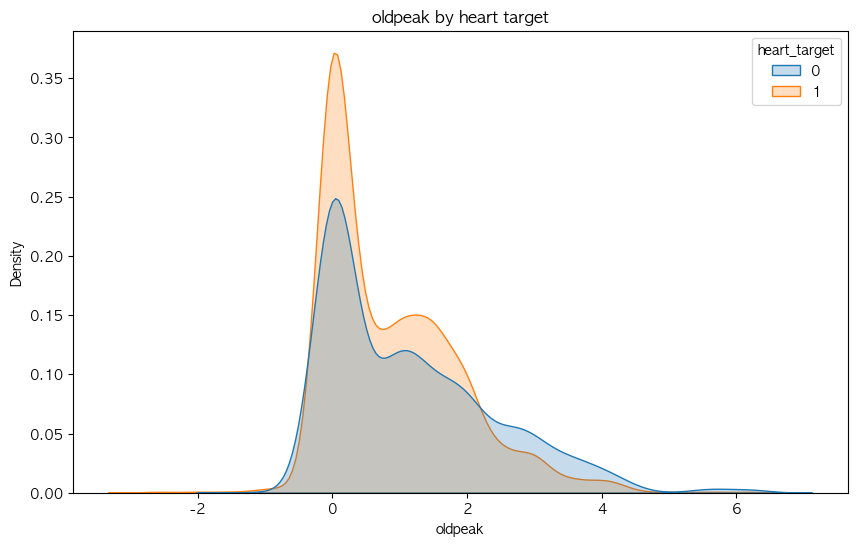

<Axes: xlabel='oldpeak', ylabel='Count'>

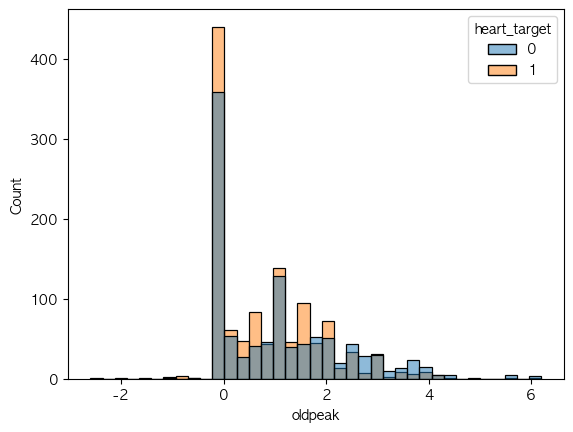

In [78]:
# 9. 운동 이후 ST 분절 하강 정도에 따른 심장 질환 유무 (비교적 안정되기까지 운동으로 유발되는 ST depression) ** ST: 심전도 측정 시 아래쪽에 보이는 선
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
sns.kdeplot(x='oldpeak', hue='heart_target',data=h_need_df, fill=True)
plt.title('oldpeak by heart target')
plt.show()


sns.histplot(x='oldpeak', hue='heart_target',data=h_need_df, fill=True)
# 일반적으로 분절하강 정도의 기울기가 0에 수렴할 수록 심장 질환에 이상이 없다는 가능성을 시사합니다.
# 해당 그래프를 봤을 때 동일한 수치를 가진 ST 분절에서 심장 질환이 있는 환자가 더 많음을 나타냅니다
# 그렇지만 해당 내용은 단일 독립 변수로 볼 수 없으며 다수의 임상 지표와 연관지어서 생각할 필요가 있습니다.

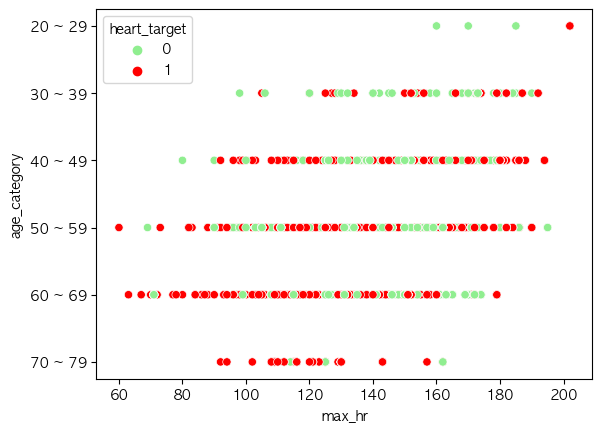

In [79]:
# 전체 데이터셋 사용 (나이별 최대 심박수, 심장질환 유무)
palette = {0: 'lightgreen', 1: 'red'}
sns.scatterplot(x='max_hr', y='age_category', hue= 'heart_target', data=h_need_df, palette=palette)
plt.show()

# 현재 보여지는 나이별 최대 심박수에 대하여 별도의 특징은 보이지 않아 더 많은 데이터 rowr가 필요하다
# 오히려 60 대 초반에 최대 심박수가 낮은 경우 더 많은 심장 질환을 보이고 있다

<Figure size 1200x1000 with 0 Axes>

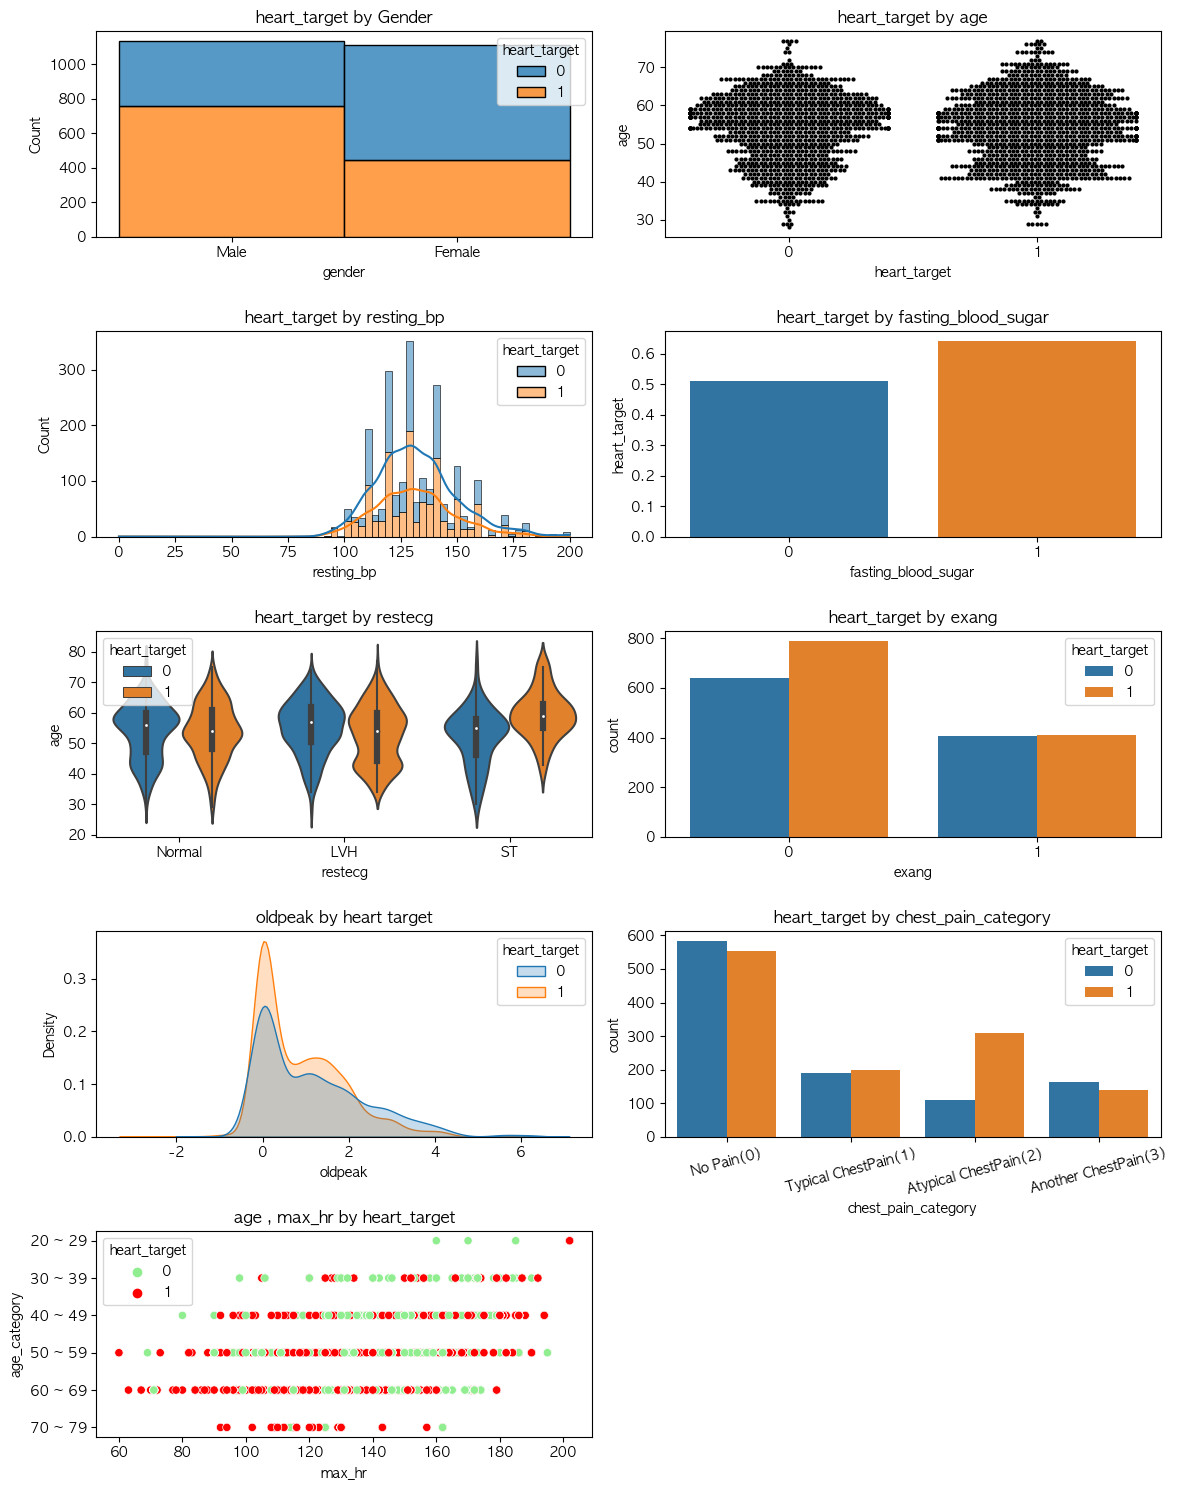

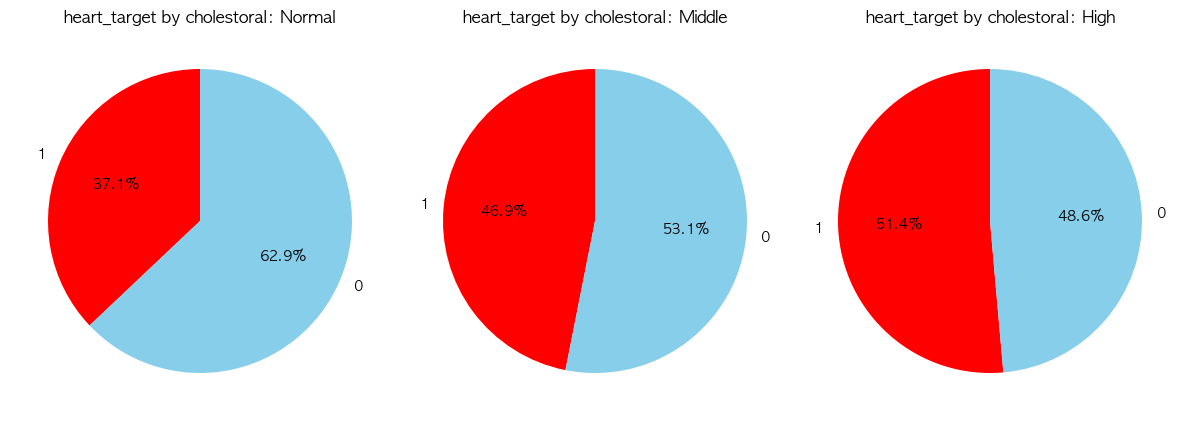

In [80]:
plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

h_need_df['heart_target'] = h_need_df['heart_target'].astype(str)
palette = {0: 'lightgreen', 1: 'red'}

order_number_pain = [0,1,2,3]

sns.histplot(x='gender', hue='heart_target', data=h_need_df, multiple='stack',ax=axes[0,0])
axes[0,0].set_title('heart_target by Gender')
sns.swarmplot(x='heart_target', y='age', data=h_need_df, color='black', size=3, ax=axes[0,1])
axes[0,1].set_title('heart_target by age')
sns.histplot(x='resting_bp', hue='heart_target', data=h_need_df, multiple='stack', kde=True, ax=axes[1,0])
axes[1,0].set_title('heart_target by resting_bp')
sns.barplot(x='fasting_blood_sugar', y='heart_target', data=mean_heart_disease, ax=axes[1,1])
axes[1,1].set_title('heart_target by fasting_blood_sugar')
sns.violinplot(x='restecg', y='age', hue='heart_target', data=h_need_df, order=['Normal', 'LVH', 'ST'], ax=axes[2,0])
axes[2,0].set_title('heart_target by restecg')
sns.countplot(x='exang', hue='heart_target', data=h_need_df, ax=axes[2,1])
axes[2,1].set_title('heart_target by exang')
sns.kdeplot(x='oldpeak', hue='heart_target',data=h_need_df, fill=True, ax=axes[3,0])
axes[3,0].set_title('oldpeak by heart target')
sns.countplot(x='chest_pain_category', hue='heart_target', data=chest_pain_df, order= order_pain, ax=axes[3,1])
axes[3,1].set_title('heart_target by chest_pain_category')
axes[3,1].set_xticklabels(axes[3,1].get_xticklabels(), rotation=15)
sns.scatterplot(x='max_hr', y='age_category', hue= 'heart_target', data=h_need_df, palette = {'0': 'lightgreen', '1': 'red'}, ax=axes[4,0])
axes[4,0].set_title('age , max_hr by heart_target')
axes[4,1].set_visible(False)


plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.tight_layout()

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for i, (cholestoral_category, data) in enumerate(counts_h_co_df.iterrows()):
    axes[i].pie(data, labels=data.index[::-1], autopct='%1.1f%%', startangle=90, colors=['red','skyblue'])
    axes[i].set_title(f'heart_target by cholestoral: {cholestoral_category}')

plt.tight_layout()
plt.show()


h_need_df['heart_target'] = h_need_df['heart_target'].astype(np.int64)

In [81]:
chest_pain_df

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,heart_target,age_category,cholestoral_category,chest_pain_category
0,28,Male,1,130,132,0,LVH,185,0,0.0,None,0,20 ~ 29,Normal,Typical ChestPain(1)
1,29,Male,1,140,263,0,Normal,170,0,0.0,None,0,20 ~ 29,High,Typical ChestPain(1)
2,29,Male,1,120,243,0,Normal,160,0,0.0,None,0,20 ~ 29,High,Typical ChestPain(1)
3,29,Female,1,130,204,0,Normal,202,0,0.0,Down,1,20 ~ 29,Middle,Typical ChestPain(1)
4,29,Female,1,130,204,0,Normal,202,0,0.0,Down,1,20 ~ 29,Middle,Typical ChestPain(1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,77,Female,0,125,304,0,Normal,162,1,0.0,Down,0,70 ~ 79,High,No Pain(0)
2242,77,Male,0,124,171,0,ST,110,1,2.0,None,1,70 ~ 79,Normal,No Pain(0)
2243,77,Female,0,125,304,0,Normal,162,1,0.0,Down,0,70 ~ 79,High,No Pain(0)
2244,77,Male,0,125,304,0,LVH,162,1,0.0,None,1,70 ~ 79,High,No Pain(0)


## 데이터 분석 결과 및 종합 평가.
1. 당뇨 발생 요인 분석 결과:
- 성별, 연령, 혈당 수치 및 BMI와 당뇨 발생 간의 상관관계는 명확하게 나타났습니다.
- 남성, 고령자, 비정상적 혈당 수치 및 높은 BMI 범주의 개인들이 당뇨병 발생 위험이 더 높은 
  경향을 보였습니다.
2. 뇌졸증/심장질환  발생 요인 분석 결과:
- 성별, 연령, BMI와 뇌졸증/심장질환 발생 간의 상관관계가 일부 유사함을 보이고 있는 것으로   
  나타났습니다.
- 혈당 수치가 절대적으로 심장/뇌졸증 질환의 판단의 지표는 될 수 없으나, 해당 데이터 셋 요소 
  확인 시 당뇨에 대한 이력도 확인 하는 결과 두 병의 관계가 없다고 말할 수는 없을 것 같습니다.
3. 심장질환 발생 요인 분석 결과:
- 혈압과 콜레스테롤 수치가 높은 개인들이 심장질환 위험이 더 높지만, 혈당 수치와는 명확한 직
  접적 연관성이 확인되지 않았습니다.
- 성별, 연령, 흉통 유무, 혈압 및 콜레스테롤 수치와 심장질환 발생 간의 상관관계는 일관적이지 
  않게 나타났습니다.
4. 각 질병에 대한 종합 평가.
-  당뇨와 심장질환 발생 요인 간에는 부분적인 연관성이 관찰됩니다. 
- 특히, 비정상적인 혈당 수치는 두 조건 모두에서 발생 위험을 높이는 요소로 나타났습니다. 
  그러나 이것은 심장질환 발생의 유일한 결정 요인은 아니며, 추가적인 변수들 과의 복합적인 
  상호작용을 통해 심장질환 발생 위험이 결정될 가능성이 있습니다.
- 연령과 BMI는 두 조건 모두에서 중요한 요인으로 확인되었으나, 당뇨병의 경우 혈당 수치가 직  
  접적인 지표로 작용하는 반면 심장질환에서는 여러 요인들이 상호작용을 하는 것으로 보입니다.
- 당뇨병 환자가 심장질환을 개발할 위험이 높은 것으로 일반적으로 알려져 있으며, 해당 질병  
  검사 시 상호간의 검사도 동일하게 진행하는 결과로 두 질병 간에는 상호 종속적인 관계가 있을    
  가능성이 높습니다.
- 결론적으로, 성별, 연령, 혈당 수치 및 BMI와 같은 요인들은 당뇨와 심장질환 발생 모두에 영향
  을 미치는 것으로 나타났으나, 이러한 질병들 간의 연관성은 복잡하며 한 요인 만으로 결정되지      
  않습니다.

## 느낀점
- 질병 발생 여부의 확정을 위해서는 포괄적인 검사와 분석이 필수적 입니다. 
- 단일 검사 결과 에서의 이상치가 반드시 질병을 의미하지는 않으며, 다양한 독립 변수들이
복합적으로 작용하여 질병의 가능성을 가늠하게 됩니다.
- 따라서, 어떠한 검사 결과도 질병 발생을 100% 확신할 수 없으며, 결과는 질병 발생의 가능성을 
높이는 요소 중 하나로 해석되어야 합니다.


In [1]:
# plt.figure(figsize=(15,15))
# for i,col in enumerate(h_need_df.columns,1):
#     plt.subplot(7,2,i)
#     plt.title(f"Distribution of {col} Data")
#     sns.histplot(h_need_df[col],kde=True)
#     plt.tight_layout()
#     plt.plot()

In [2]:
# plt.figure(figsize=(15,10))
# sns.pairplot(h_need_df,hue="heart_target")
# plt.title("Looking for Insites in Data")
# plt.legend("HeartDisease")
# plt.tight_layout()
# plt.plot()

In [3]:
# plt.figure(figsize=(15,10))
# sns.pairplot(diabetes_need_df,hue="diabetes")
# plt.title("Looking for Insites in Data")
# plt.legend("diabetes")
# plt.tight_layout()
# plt.plot()

In [4]:
# plt.figure(figsize=(15,10))
# sns.pairplot(hs_need_df,hue="Heart_stroke")
# plt.title("Looking for Insites in Data")
# plt.legend("Heart_stroke")
# plt.tight_layout()
# plt.plot()

<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0001.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0002.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0003.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0004.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0005.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0006.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0007.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0008.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0009.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0010.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0011.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0012.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0013.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0014.jpg"> 
<hr>
<img src="./images/데이터분석 이미지/데이터분석 프로젝트 보고서_page-0015.jpg"> 